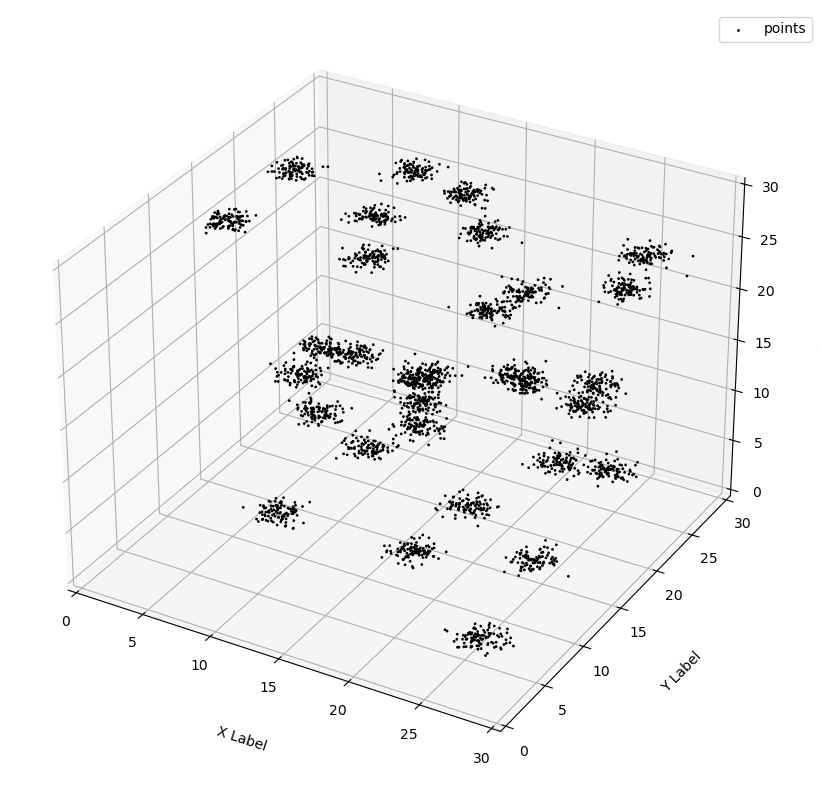

In [152]:
# Dataset Visualization

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []
z = []

fp = open("./artd-31.csv", 'r')

spots = fp.readlines() 
length = len(spots)

i = 0
x_max = 0
y_max = 0
z_max = 0

while i < length: 
    pt = spots[i].strip().split(',')
    if float(pt[1]) > x_max: x_max = float(pt[1])
    if float(pt[2]) > y_max: y_max = float(pt[2])
    if float(pt[3]) > z_max: z_max = float(pt[3])
        
    x.append(float(pt[1]))
    y.append(float(pt[2]))
    z.append(float(pt[3]))
    i += 1

fp.close()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='black', marker='o', s=1, label='points')

ax.set_xlabel('X Label', labelpad=20)
ax.set_ylabel('Y Label', labelpad=20)
ax.set_zlabel('Z Label', labelpad=20)

ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_zlim([0, 30])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()


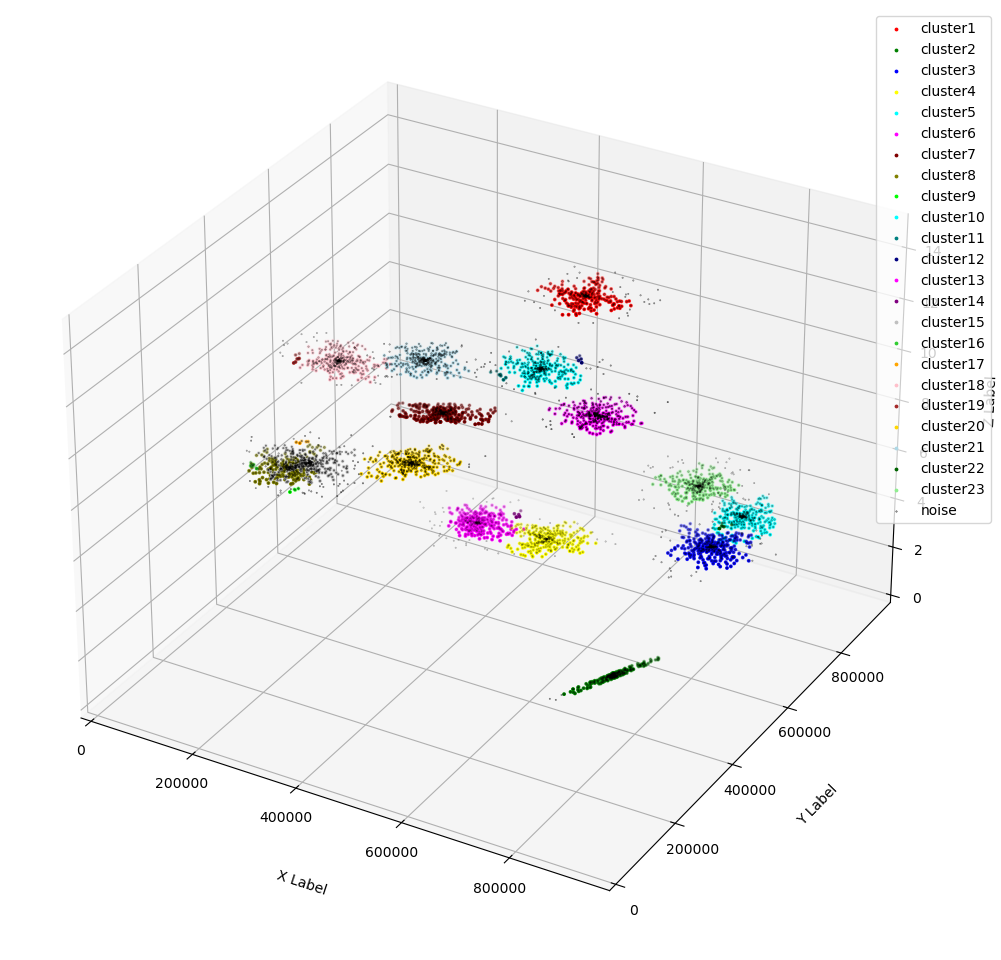

In [131]:
# DBSCAN result visualization

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Input Result of DBSCAN

cluster_num = 23
cluster_data = """
Cluster #1 => p1 p2 p3 p4 p6 p7 p8 p9 p10 p11 p12 p13 p14 p15 p16 p17 p18 p19 p20 p21 p22 p23 p25 p26 p27 p28 p29 p30 p31 p32 p33 p35 p36 p37 p38 p39 p40 p41 p42 p43 p44 p45 p46 p47 p49 p50 p51 p54 p55 p56 p57 p58 p59 p60 p62 p63 p64 p65 p66 p67 p68 p69 p70 p71 p72 p73 p74 p75 p77 p78 p79 p80 p81 p82 p83 p85 p86 p87 p88 p89 p90 p91 p92 p93 p94 p95 p96 p97 p98 p99 p100 p103 p104 p105 p106 p107 p108 p109 p111 p112 p113 p114 p115 p116 p117 p118 p119 p120 p121 p124 p125 p126 p127 p128 p129 p133 p134 p136 p137 p138 p139 p140 p141 p142 p143 p144 p145 p146 p147 p148 p149 p150 p151 p152 p153 p154 p155 p157 p158 p159 p160 p161 p162 p163 p164 p165 p166 p168 p169 p170 p171 p172 p173 p174 p175 p176 p177 p178 p179 p180 p182 p183 p184 p185 p186 p187 p188 p189 p190 p191 p193 p194 p195 p196 p198 p199 p200 p201 p202 p203 p204 p205 p206 p207 p208 p210 p211 p212 p213 p214 p215 p216 p217 p218 p219 p220 p221 p222 p223 p224 p225 p226 p229 p230 p231 p232 p234 p235 p237 p238 p240 p241 p242 p243 p244 p245 p246 p247 p249 p250 p251 p252 p254 p255 p258 p260 p261 p262 p263 p264 p265 p266 p267 p268 p269 p270 p271 p272 p273 p274 p276 p277 p278 p279 p280 p281 p282 p283 p284 p285 p287 p288 p289 p290 p291 p292 p293 p294 p295 p296 p297 p298 p299 p300
Cluster #2 => p301 p302 p303 p304 p307 p308 p309 p310 p311 p312 p313 p314 p315 p316 p317 p318 p319 p320 p321 p322 p323 p324 p325 p326 p327 p329 p330 p331 p332 p333 p334 p335 p336 p337 p338 p339 p340 p341 p342 p343 p344 p345 p346 p347 p348 p349 p350 p351 p352 p353 p354 p355 p356 p357 p358 p359 p360 p361 p362 p363 p364 p365 p366 p367 p368 p369 p370 p371 p372 p373 p374 p375 p376 p377 p378 p379 p381 p382 p385 p386 p387 p388 p389 p390 p391 p392 p393 p394 p395 p396 p397 p398 p399 p400 p401 p402 p403 p404 p405 p406 p407 p408 p409 p410 p411 p412 p413 p414 p415 p416 p417 p418 p419 p420 p421 p422 p423 p424 p425 p426 p427 p428 p429 p430 p431 p432 p433 p434 p435 p436 p437 p438 p439 p440 p441 p442 p443 p444 p445 p446 p447 p448 p449 p450 p451 p452 p453 p454 p455 p456 p457 p458 p459 p460 p461 p462 p463 p464 p465 p466 p467 p468 p469 p470 p471 p472 p473 p474 p475 p476 p477 p478 p479 p480 p481 p482 p483 p484 p485 p486 p487 p488 p489 p490 p491 p492 p493 p494 p495 p496 p497 p498 p499 p500 p501 p502 p503 p504 p505 p506 p507 p508 p509 p510 p511 p512 p513 p514 p515 p516 p517 p518 p519 p520 p521 p522 p523 p524 p525 p526 p527 p528 p529 p530 p531 p532 p533 p534 p535 p536 p537 p538 p539 p540 p541 p542 p543 p544 p545 p546 p547 p548 p549 p550 p551 p552 p553 p554 p555 p556 p557 p558 p559 p560 p561 p562 p563 p564 p565 p566 p567 p568 p569 p570 p571 p572 p573 p574 p575 p576 p577 p578 p579 p580 p581 p582 p583 p584 p585 p586 p587 p588 p589 p590 p591 p592 p593 p594 p595 p596 p597 p598 p599 p601 p602 p603 p604 p605 p606 p607 p608 p609 p610 p611 p612 p613 p614 p615 p616
Cluster #3 => p328 p380 p4301 p4302 p4303 p4304 p4305 p4306 p4307 p4308 p4309 p4310 p4311 p4312 p4313 p4314 p4315 p4316 p4317 p4318 p4320 p4321 p4322 p4323 p4324 p4325 p4327 p4328 p4329 p4330 p4331 p4332 p4333 p4334 p4335 p4336 p4337 p4338 p4339 p4340 p4341 p4342 p4343 p4344 p4345 p4346 p4347 p4348 p4349 p4350 p4352 p4353 p4354 p4355 p4356 p4357 p4358 p4359 p4360 p4361 p4362 p4363 p4364 p4365 p4366 p4367 p4368 p4369 p4370 p4371 p4372 p4373 p4374 p4376 p4377 p4378 p4379 p4380 p4381 p4382 p4383 p4384 p4385 p4386 p4388 p4389 p4390 p4391 p4392 p4393 p4394 p4395 p4396 p4397 p4398 p4399 p4400 p4401 p4402 p4403 p4404 p4406 p4407 p4408 p4409 p4410 p4411 p4413 p4414 p4415 p4416 p4417 p4418 p4419 p4420 p4421 p4422 p4423 p4424 p4425 p4426 p4428 p4430 p4431 p4432 p4433 p4434 p4435 p4436 p4437 p4438 p4439 p4440 p4441 p4442 p4443 p4444 p4445 p4446 p4448 p4449 p4450 p4451 p4453 p4454 p4456 p4457 p4458 p4459 p4460 p4461 p4463 p4464 p4465 p4466 p4467 p4468 p4470 p4471 p4472 p4473 p4476 p4477 p4478 p4479 p4480 p4481 p4482 p4483 p4484 p4485 p4486 p4487 p4488 p4490 p4491 p4492 p4494 p4495 p4496 p4497 p4498 p4499 p4500 p4501 p4502 p4503 p4504 p4505 p4506 p4507 p4508 p4509 p4510 p4512 p4513 p4514 p4515 p4517 p4518 p4519 p4521 p4522 p4523 p4524 p4525 p4526 p4527 p4528 p4529 p4530 p4531 p4532 p4533 p4534 p4535 p4536 p4537 p4538 p4539 p4540 p4542 p4543 p4544 p4545 p4546 p4547 p4548 p4549 p4550 p4553 p4554 p4555 p4556 p4557 p4558 p4560 p4561 p4562 p4563 p4564 p4565 p4566 p4568 p4569 p4570 p4571 p4573 p4574 p4575 p4577 p4578 p4579 p4580 p4581 p4582 p4583 p4584 p4585 p4586 p4587 p4588 p4589 p4590 p4591 p4592 p4593 p4594 p4595 p4596 p4597 p4598 p4599 p4600 p4602 p4603 p4605 p4606 p4607 p4609 p4610 p4611 p4612 p4613 p4614 p4615 p4617 p4618 p4619 p4620 p4621 p4622 p4623 p4625 p4626 p4627 p4628 p4629 p4630 p4631 p4632 p4633 p4634 p4635 p4636 p4638 p4639 p4640 p4641 p4642 p4643 p4644 p4645 p4646 p4647 p4648 p4649 p4650
Cluster #4 => p617 p618 p619 p620 p621 p622 p623 p624 p625 p626 p627 p628 p629 p630 p631 p632 p633 p634 p635 p636 p637 p638 p639 p640 p641 p642 p643 p644 p645 p646 p647 p648 p649 p650 p652 p653 p654 p655 p656 p657 p658 p659 p660 p661 p662 p663 p664 p665 p666 p667 p668 p669 p670 p671 p672 p673 p674 p675 p676 p677 p678 p679 p680 p681 p682 p683 p684 p685 p686 p687 p688 p689 p690 p691 p693 p694 p695 p696 p697 p698 p699 p700 p701 p702 p703 p704 p705 p706 p707 p708 p709 p710 p711 p712 p713 p714 p715 p716 p717 p718 p719 p720 p721 p722 p723 p724 p725 p726 p727 p728 p729 p730 p731 p732 p733 p734 p735 p736 p737 p738 p739 p740 p741 p743 p744 p745 p746 p747 p748 p749 p750 p751 p752 p753 p754 p755 p756 p757 p758 p759 p760 p761 p762 p763 p764 p766 p767 p768 p769 p770 p772 p773 p774 p775 p776 p777 p778 p779 p780 p781 p782 p783 p784 p785 p786 p788 p789 p790 p792 p793 p794 p795 p796 p797 p798 p799 p800 p801 p802 p803 p804 p805 p806 p807 p808 p809 p812 p813 p814 p816 p817 p818 p819 p820 p821 p822 p823 p824 p825 p826 p827 p828 p829 p830 p831 p832 p833 p834 p835 p836 p837 p838 p839 p840 p841 p842 p843 p844 p845 p846 p847 p848 p849 p850 p851 p852 p853 p854 p855 p856 p857 p858 p859 p860 p861 p862 p863 p864 p865 p866 p867 p868 p869 p870 p871 p872 p873 p874 p875 p876 p877 p878 p879 p880 p881 p882 p883 p884 p885 p886 p887 p888 p889 p890 p891 p892 p893 p894 p895 p896 p897 p898 p899 p900 p901 p902 p903 p904 p905 p906 p907 p908 p909 p910 p911 p912 p913 p915 p916 p917 p918 p919 p921 p922 p923 p924 p925 p926 p927 p928 p929 p930
Cluster #5 => p931 p932 p934 p935 p936 p937 p938 p939 p940 p941 p942 p943 p944 p945 p946 p947 p948 p949 p950 p951 p952 p953 p954 p955 p956 p957 p958 p959 p960 p961 p962 p963 p964 p965 p966 p967 p969 p970 p971 p972 p973 p974 p975 p976 p977 p978 p979 p980 p981 p982 p983 p984 p985 p986 p987 p988 p989 p990 p991 p992 p993 p994 p995 p996 p998 p999 p1000 p1001 p1002 p1003 p1004 p1005 p1006 p1007 p1008 p1009 p1010 p1011 p1012 p1013 p1014 p1015 p1016 p1017 p1018 p1019 p1020 p1021 p1023 p1024 p1025 p1027 p1028 p1029 p1030 p1031 p1032 p1033 p1034 p1035 p1036 p1037 p1038 p1039 p1040 p1042 p1043 p1044 p1045 p1047 p1048 p1049 p1050 p1051 p1052 p1053 p1054 p1055 p1056 p1057 p1058 p1059 p1061 p1062 p1063 p1064 p1065 p1066 p1067 p1068 p1069 p1070 p1071 p1072 p1073 p1075 p1077 p1078 p1079 p1080 p1081 p1082 p1083 p1084 p1085 p1086 p1087 p1088 p1089 p1090 p1091 p1092 p1093 p1094 p1095 p1096 p1097 p1098 p1099 p1100 p1101 p1102 p1103 p1104 p1105 p1106 p1107 p1108 p1109 p1112 p1113 p1114 p1115 p1116 p1117 p1118 p1119 p1120 p1121 p1122 p1123 p1124 p1125 p1126 p1127 p1128 p1129 p1130 p1131 p1133 p1134 p1135 p1136 p1137 p1138 p1139 p1140 p1141 p1142 p1143 p1144 p1145 p1146 p1147 p1148 p1149 p1150 p1151 p1152 p1153 p1154 p1155 p1156 p1157 p1158 p1159 p1160 p1161 p1162 p1163 p1164 p1165 p1166 p1167 p1169 p1170 p1171 p1172 p1173 p1174 p1175 p1176 p1177 p1178 p1179 p1180 p1181 p1182 p1184 p1185 p1186 p1187 p1188 p1190 p1191 p1192 p1193 p1194 p1195 p1196 p1197 p1198 p1199 p1200 p1201 p1202 p1203 p1204 p1205 p1206 p1207 p1208 p1209 p1210 p1211 p1212 p1214 p1215 p1216 p1217 p1218 p1219 p1220 p1221 p1222 p1223 p1224 p1225 p1226 p1227 p1228 p1229 p1230 p1231 p1232 p1233 p1234 p1235 p1236 p1238 p1239 p1240 p1241 p1242 p1243 p1244 p1245 p1246 p1247 p1248 p4326 p4412
Cluster #6 => p1249 p1250 p1251 p1252 p1253 p1254 p1255 p1256 p1257 p1258 p1259 p1260 p1261 p1262 p1263 p1264 p1265 p1266 p1267 p1268 p1269 p1270 p1271 p1272 p1273 p1274 p1275 p1276 p1277 p1278 p1279 p1280 p1281 p1282 p1283 p1284 p1285 p1286 p1287 p1288 p1289 p1290 p1291 p1292 p1293 p1294 p1295 p1296 p1297 p1298 p1299 p1300 p1301 p1302 p1303 p1304 p1305 p1306 p1307 p1308 p1309 p1310 p1311 p1312 p1313 p1314 p1315 p1316 p1317 p1318 p1319 p1320 p1321 p1322 p1323 p1324 p1325 p1326 p1327 p1328 p1329 p1330 p1331 p1332 p1333 p1335 p1336 p1337 p1338 p1339 p1340 p1341 p1342 p1343 p1344 p1345 p1346 p1347 p1348 p1349 p1350 p1351 p1352 p1353 p1354 p1355 p1356 p1357 p1358 p1359 p1360 p1361 p1362 p1363 p1364 p1365 p1366 p1367 p1368 p1369 p1370 p1371 p1372 p1373 p1374 p1375 p1376 p1377 p1378 p1379 p1380 p1381 p1382 p1383 p1384 p1385 p1386 p1387 p1388 p1389 p1390 p1391 p1392 p1393 p1394 p1395 p1396 p1397 p1398 p1399 p1400 p1401 p1402 p1403 p1404 p1405 p1408 p1409 p1411 p1412 p1413 p1414 p1415 p1416 p1417 p1418 p1419 p1420 p1421 p1422 p1423 p1425 p1426 p1427 p1428 p1429 p1430 p1431 p1432 p1433 p1434 p1435 p1437 p1438 p1439 p1440 p1441 p1442 p1443 p1444 p1445 p1446 p1447 p1448 p1449 p1451 p1452 p1453 p1454 p1455 p1456 p1457 p1458 p1459 p1460 p1461 p1462 p1463 p1465 p1466 p1467 p1468 p1469 p1470 p1471 p1472 p1473 p1474 p1475 p1476 p1477 p1478 p1479 p1480 p1481 p1482 p1483 p1484 p1486 p1487 p1488 p1489 p1490 p1491 p1493 p1494 p1495 p1496 p1497 p1498 p1499 p1500 p1501 p1502 p1503 p1504 p1505 p1506 p1507 p1508 p1509 p1510 p1511 p1512 p1513 p1514 p1515 p1516 p1517 p1518 p1519 p1520 p1521 p1522 p1523 p1524 p1525 p1526 p1527 p1528 p1529 p1530 p1531 p1533 p1535 p1536 p1537 p1538 p1539 p1540 p1541 p1542 p1543 p1544 p1545 p1546 p1547 p1548 p1549 p1550 p1551 p1552 p1553 p1554 p1555 p1556 p1557 p1558 p1559 p1560 p1561 p1562 p1563 p1564 p1565 p1566 p1567 p1568 p1569 p1570 p1571 p1572 p1573
Cluster #7 => p1574 p1575 p1576 p1577 p1578 p1579 p1580 p1581 p1582 p1583 p1584 p1585 p1586 p1587 p1588 p1589 p1590 p1591 p1592 p1593 p1594 p1595 p1596 p1598 p1599 p1600 p1601 p1602 p1603 p1604 p1605 p1606 p1607 p1608 p1609 p1610 p1611 p1612 p1613 p1614 p1615 p1616 p1617 p1618 p1619 p1620 p1621 p1622 p1623 p1624 p1625 p1626 p1627 p1628 p1629 p1630 p1631 p1632 p1633 p1634 p1635 p1637 p1638 p1639 p1640 p1641 p1642 p1643 p1644 p1645 p1646 p1647 p1648 p1649 p1650 p1651 p1652 p1653 p1654 p1655 p1656 p1657 p1658 p1659 p1660 p1662 p1663 p1664 p1665 p1666 p1667 p1668 p1669 p1670 p1671 p1672 p1673 p1674 p1675 p1676 p1677 p1678 p1679 p1680 p1681 p1682 p1683 p1684 p1685 p1686 p1687 p1688 p1689 p1690 p1691 p1692 p1693 p1694 p1695 p1697 p1698 p1699 p1700 p1701 p1702 p1703 p1704 p1705 p1706 p1707 p1708 p1709 p1710 p1711 p1712 p1713 p1714 p1715 p1716 p1717 p1718 p1719 p1720 p1721 p1722 p1723 p1725 p1726 p1727 p1728 p1729 p1730 p1731 p1732 p1733 p1734 p1735 p1736 p1737 p1738 p1739 p1740 p1741 p1742 p1743 p1744 p1745 p1746 p1747 p1748 p1749 p1750 p1751 p1752 p1753 p1754 p1755 p1756 p1757 p1758 p1759 p1760 p1761 p1762 p1763 p1764 p1765 p1766 p1767 p1768 p1769 p1770 p1771 p1772 p1773 p1774 p1775 p1776 p1777 p1778 p1779 p1780 p1781 p1782 p1783 p1784 p1785 p1786 p1787 p1788 p1789 p1790 p1791 p1792 p1793 p1794 p1795 p1796 p1797 p1798 p1799 p1800 p1801 p1802 p1803 p1804 p1805 p1806 p1807 p1808 p1809 p1810 p1811 p1812 p1813 p1814 p1815 p1816 p1817 p1818 p1819 p1820 p1821 p1822 p1823 p1824 p1825 p1826 p1827 p1829 p1830 p1831 p1832 p1833 p1834 p1835 p1836 p1837 p1838 p1839 p1840 p1841 p1842 p1843 p1844 p1845 p1846 p1847 p1848 p1849 p1850 p1851 p1852 p1853 p1854 p1855 p1856 p1857 p1858 p1859 p1860 p1861 p1862 p1863 p1864 p1865 p1866 p1867 p1868 p1869 p1870 p1871 p1872 p1873 p1874 p1875 p1876 p1877 p1878 p1879 p1880 p1881 p1882 p1883 p1884 p1885 p1886 p1887 p1889 p1890 p1891 p1892 p1893 p1894 p1895 p1896 p1897 p1898 p1899 p3382 p3420 p3441 p3582
Cluster #8 => p1900 p1901 p1902 p1903 p1905 p1907 p1908 p1909 p1910 p1911 p1912 p1913 p1915 p1916 p1917 p1918 p1919 p1920 p1921 p1922 p1923 p1924 p1925 p1926 p1927 p1928 p1929 p1930 p1931 p1932 p1933 p1934 p1935 p1936 p1937 p1939 p1940 p1942 p1943 p1944 p1945 p1946 p1947 p1948 p1949 p1950 p1951 p1952 p1953 p1954 p1955 p1956 p1957 p1959 p1960 p1961 p1962 p1963 p1964 p1965 p1966 p1967 p1968 p1969 p1970 p1971 p1972 p1973 p1974 p1975 p1977 p1978 p1979 p1980 p1981 p1982 p1983 p1985 p1987 p1988 p1989 p1990 p1991 p1993 p1994 p1995 p1996 p1998 p1999 p2000 p2001 p2002 p2003 p2004 p2005 p2006 p2007 p2008 p2009 p2010 p2011 p2012 p2013 p2014 p2015 p2016 p2017 p2018 p2019 p2020 p2021 p2022 p2023 p2024 p2025 p2026 p2027 p2028 p2029 p2030 p2031 p2032 p2034 p2035 p2036 p2037 p2038 p2039 p2040 p2041 p2042 p2043 p2044 p2045 p2046 p2047 p2048 p2050 p2051 p2052 p2053 p2054 p2055 p2056 p2057 p2058 p2059 p2060 p2061 p2062 p2063 p2064 p2065 p2066 p2067 p2068 p2069 p2070 p2071 p2072 p2073 p2074 p2075 p2076 p2078 p2079 p2080 p2082 p2083 p2084 p2085 p2086 p2087 p2089 p2090 p2091 p2092 p2093 p2094 p2095 p2096 p2097 p2098 p2099 p2100 p2101 p2102 p2103 p2104 p2105 p2106 p2107 p2108 p2109 p2110 p2111 p2112 p2113 p2114 p2115 p2116 p2117 p2118 p2119 p2120 p2121 p2122 p2123 p2124 p2126 p2127 p2128 p2129 p2130 p2131 p2132 p2133 p2134 p2135 p2136 p2137 p2138 p2139 p2140 p2141 p2142 p2143 p2144 p2146 p2147 p2148 p2149 p2150 p2151 p2152 p2153 p2154 p2155 p2156 p2157 p2158 p2159 p2160 p2161 p2163 p2165 p2166 p2167 p2169 p2170 p2171 p2172 p2173 p2174 p2175 p2176 p2177 p2178 p2179 p2180 p2181 p2182 p2183 p2184 p2185 p2186 p2187 p2188 p2189 p2190 p2191 p2192 p2193 p2194 p2195 p2196 p2197 p2198 p2199 p2201 p2202 p2204 p2205 p2206 p2207 p2208 p2209 p2210 p2211 p2212 p2213 p2214 p2215 p2216 p2217 p2218 p2219 p2220 p2221 p2222 p2223 p2224 p2225 p2226 p2227 p2228 p2229 p2230 p2231 p2232 p2233
Cluster #9 => p1906 p1976 p2088 p2162 p2164
Cluster #10 => p2235 p2236 p2237 p2238 p2239 p2240 p2241 p2242 p2243 p2244 p2245 p2246 p2247 p2248 p2249 p2250 p2251 p2252 p2253 p2254 p2255 p2256 p2257 p2258 p2259 p2260 p2261 p2262 p2263 p2264 p2265 p2266 p2267 p2268 p2269 p2270 p2271 p2272 p2273 p2274 p2275 p2276 p2277 p2278 p2279 p2282 p2283 p2285 p2286 p2288 p2289 p2290 p2291 p2292 p2293 p2294 p2295 p2296 p2298 p2299 p2300 p2301 p2302 p2303 p2304 p2306 p2307 p2308 p2309 p2310 p2311 p2312 p2313 p2314 p2315 p2316 p2317 p2318 p2319 p2320 p2321 p2322 p2323 p2324 p2325 p2327 p2328 p2329 p2330 p2331 p2332 p2335 p2336 p2337 p2338 p2339 p2340 p2341 p2342 p2344 p2345 p2346 p2347 p2348 p2349 p2350 p2351 p2352 p2353 p2354 p2355 p2356 p2357 p2358 p2359 p2360 p2361 p2362 p2364 p2365 p2366 p2367 p2368 p2369 p2370 p2372 p2373 p2374 p2376 p2378 p2379 p2381 p2382 p2383 p2384 p2385 p2386 p2387 p2388 p2390 p2391 p2392 p2393 p2394 p2395 p2396 p2397 p2398 p2400 p2401 p2402 p2404 p2405 p2406 p2407 p2408 p2410 p2411 p2412 p2413 p2414 p2415 p2416 p2417 p2418 p2419 p2421 p2422 p2423 p2424 p2425 p2426 p2427 p2428 p2429 p2430 p2431 p2432 p2433 p2434 p2436 p2438 p2439 p2440 p2441 p2442 p2443 p2444 p2446 p2447 p2449 p2450 p2451 p2452 p2453 p2454 p2455 p2456 p2457 p2458 p2459 p2461 p2462 p2463 p2464 p2465 p2466 p2467 p2469 p2470 p2472 p2473 p2475 p2477 p2478 p2479 p2480 p2481 p2482 p2483 p2484 p2485 p2486 p2487 p2488 p2489 p2490 p2491 p2492 p2493 p2494 p2495 p2496 p2497 p2499 p2500 p2501 p2502 p2503 p2505 p2506 p2507 p2508 p2509 p2510 p2511 p2512 p2513 p2514 p2515 p2516 p2517 p2518 p2519 p2520 p2521 p2522 p2523 p2524 p2525 p2526 p2527 p2528 p2529 p2530 p2531 p2533 p2535 p2536 p2537 p2539 p2542 p2543 p2544 p2545 p2546 p2547 p2548 p2549 p2550 p2551 p2552 p2553 p2554 p2555 p2557 p2558 p2559 p2560 p2561 p2562 p2563 p2564 p2565 p2566 p2567 p2568 p2569 p2570 p2571
Cluster #11 => p2297 p2326 p2334 p2420 p2437 p2445 p2540
Cluster #12 => p156 p2363 p2399 p2534 p2541
Cluster #13 => p2572 p2574 p2575 p2576 p2577 p2578 p2579 p2580 p2581 p2582 p2583 p2584 p2585 p2586 p2587 p2588 p2589 p2590 p2591 p2592 p2593 p2594 p2595 p2596 p2597 p2598 p2599 p2600 p2601 p2602 p2603 p2605 p2606 p2607 p2609 p2610 p2611 p2612 p2613 p2614 p2615 p2616 p2617 p2618 p2619 p2620 p2621 p2623 p2624 p2625 p2626 p2627 p2628 p2629 p2630 p2631 p2632 p2634 p2635 p2636 p2637 p2638 p2639 p2640 p2641 p2642 p2643 p2644 p2645 p2646 p2647 p2648 p2649 p2650 p2651 p2652 p2653 p2654 p2656 p2657 p2658 p2659 p2661 p2662 p2664 p2665 p2666 p2667 p2668 p2669 p2670 p2671 p2672 p2673 p2674 p2675 p2676 p2678 p2679 p2680 p2681 p2682 p2683 p2684 p2685 p2686 p2687 p2688 p2690 p2691 p2692 p2693 p2695 p2696 p2697 p2698 p2699 p2700 p2701 p2702 p2703 p2704 p2705 p2706 p2707 p2708 p2709 p2710 p2711 p2712 p2716 p2717 p2718 p2719 p2722 p2723 p2724 p2725 p2726 p2727 p2728 p2730 p2731 p2732 p2733 p2734 p2735 p2736 p2738 p2739 p2740 p2741 p2742 p2743 p2744 p2745 p2746 p2747 p2748 p2749 p2750 p2751 p2753 p2754 p2755 p2756 p2757 p2758 p2759 p2760 p2761 p2762 p2763 p2764 p2765 p2766 p2767 p2768 p2769 p2770 p2772 p2773 p2774 p2775 p2776 p2777 p2778 p2779 p2780 p2781 p2782 p2783 p2784 p2786 p2787 p2788 p2789 p2790 p2792 p2793 p2794 p2796 p2797 p2798 p2799 p2800 p2801 p2802 p2803 p2804 p2806 p2807 p2809 p2810 p2811 p2812 p2813 p2814 p2815 p2816 p2817 p2818 p2819 p2820 p2821 p2822 p2823 p2824 p2825 p2826 p2827 p2828 p2829 p2830 p2831 p2832 p2833 p2834 p2835 p2836 p2837 p2838 p2839 p2841 p2843 p2844 p2845 p2847 p2848 p2849 p2850 p2851 p2852 p2853 p2854 p2855 p2856 p2859 p2860 p2861 p2863 p2864 p2865 p2866 p2867 p2868 p2869 p2870 p2871 p2872 p2873 p2874 p2875 p2876 p2879 p2881 p2882 p2883 p2884 p2885 p2887 p2888 p2889 p2890 p2891 p2892 p2894 p2895 p2896 p2897 p2898 p2899 p2900 p2901 p2902 p2903 p2904 p2905 p2906 p2907 p2908 p2909 p2910 p2911
Cluster #14 => p2622 p2633 p2655 p2878 p2893
Cluster #15 => p2913 p2915 p2916 p2917 p2919 p2920 p2921 p2922 p2923 p2924 p2925 p2926 p2927 p2929 p2930 p2931 p2932 p2933 p2934 p2935 p2936 p2937 p2938 p2939 p2940 p2941 p2942 p2943 p2944 p2945 p2946 p2947 p2948 p2949 p2950 p2952 p2954 p2955 p2956 p2957 p2958 p2959 p2961 p2962 p2963 p2964 p2965 p2966 p2967 p2968 p2969 p2970 p2971 p2972 p2973 p2974 p2975 p2976 p2977 p2978 p2979 p2980 p2981 p2982 p2985 p2986 p2987 p2988 p2990 p2993 p2994 p2995 p2996 p2997 p2998 p2999 p3000 p3001 p3002 p3003 p3004 p3005 p3006 p3007 p3008 p3009 p3010 p3011 p3012 p3013 p3015 p3016 p3017 p3018 p3019 p3020 p3021 p3022 p3023 p3024 p3025 p3026 p3027 p3028 p3029 p3031 p3032 p3033 p3034 p3036 p3037 p3038 p3039 p3040 p3041 p3042 p3043 p3044 p3046 p3047 p3048 p3049 p3052 p3053 p3054 p3055 p3056 p3057 p3059 p3060 p3061 p3062 p3063 p3064 p3065 p3066 p3067 p3070 p3071 p3072 p3073 p3074 p3075 p3076 p3077 p3078 p3079 p3080 p3081 p3083 p3085 p3086 p3087 p3088 p3089 p3090 p3091 p3092 p3093 p3094 p3095 p3096 p3097 p3098 p3099 p3100 p3101 p3103 p3104 p3105 p3106 p3107 p3108 p3109 p3111 p3112 p3113 p3114 p3116 p3118 p3119 p3120 p3121 p3122 p3123 p3124 p3125 p3126 p3127 p3128 p3129 p3130 p3131 p3132 p3133 p3135 p3137 p3139 p3140 p3141 p3142 p3143 p3144 p3145 p3146 p3147 p3148 p3149 p3150 p3151 p3152 p3153 p3154 p3155 p3156 p3157 p3159 p3161 p3162 p3163 p3164 p3165 p3167 p3168 p3169 p3170 p3171 p3172 p3173 p3174 p3175 p3177 p3178 p3179 p3180 p3181 p3183 p3184 p3185 p3186 p3188 p3189 p3190 p3191 p3192 p3194 p3195 p3196 p3197 p3198 p3199 p3201 p3202 p3203 p3205 p3206 p3208 p3210 p3211 p3212 p3213 p3214 p3215 p3216 p3218 p3219 p3220 p3221 p3223 p3224 p3225 p3226 p3227 p3228 p3229 p3230 p3232 p3234 p3235 p3236 p3237 p3238 p3239 p3240 p3241 p3242 p3243 p3245 p3246 p3247 p3248 p3249 p3250 p3251 p3252 p3254
Cluster #16 => p2918 p2991 p3117 p3207 p3244
Cluster #17 => p3030 p3035 p3110 p3222 p3231
Cluster #18 => p1888 p3255 p3256 p3257 p3258 p3259 p3260 p3261 p3262 p3263 p3264 p3265 p3266 p3267 p3268 p3269 p3270 p3271 p3274 p3275 p3276 p3277 p3278 p3279 p3280 p3281 p3282 p3283 p3284 p3285 p3286 p3287 p3288 p3289 p3290 p3291 p3292 p3293 p3294 p3295 p3297 p3298 p3299 p3300 p3301 p3302 p3303 p3304 p3305 p3306 p3307 p3308 p3309 p3310 p3311 p3312 p3313 p3315 p3316 p3318 p3319 p3320 p3321 p3322 p3323 p3324 p3325 p3326 p3327 p3328 p3329 p3330 p3331 p3332 p3333 p3334 p3335 p3336 p3337 p3338 p3339 p3340 p3341 p3343 p3344 p3345 p3346 p3347 p3349 p3350 p3351 p3352 p3353 p3354 p3355 p3356 p3357 p3358 p3360 p3361 p3362 p3363 p3364 p3365 p3366 p3367 p3368 p3370 p3371 p3372 p3374 p3375 p3376 p3377 p3378 p3379 p3380 p3381 p3383 p3384 p3385 p3386 p3387 p3388 p3389 p3390 p3391 p3392 p3393 p3394 p3395 p3396 p3397 p3398 p3399 p3400 p3401 p3402 p3403 p3404 p3405 p3406 p3407 p3408 p3409 p3411 p3412 p3413 p3414 p3415 p3416 p3417 p3418 p3419 p3421 p3422 p3423 p3424 p3425 p3426 p3428 p3429 p3430 p3431 p3432 p3433 p3434 p3436 p3437 p3438 p3439 p3440 p3442 p3443 p3444 p3445 p3446 p3447 p3448 p3449 p3450 p3451 p3452 p3453 p3454 p3455 p3457 p3458 p3459 p3460 p3461 p3462 p3463 p3465 p3466 p3467 p3468 p3469 p3470 p3471 p3472 p3473 p3474 p3475 p3476 p3477 p3478 p3479 p3480 p3481 p3482 p3483 p3484 p3485 p3486 p3487 p3488 p3489 p3490 p3491 p3492 p3493 p3494 p3495 p3496 p3497 p3498 p3499 p3500 p3501 p3502 p3503 p3504 p3505 p3506 p3507 p3508 p3509 p3510 p3511 p3512 p3514 p3515 p3516 p3517 p3518 p3519 p3520 p3521 p3522 p3523 p3524 p3525 p3527 p3528 p3529 p3530 p3531 p3532 p3533 p3534 p3535 p3536 p3537 p3538 p3539 p3540 p3541 p3542 p3543 p3544 p3545 p3546 p3547 p3548 p3549 p3551 p3552 p3553 p3554 p3555 p3556 p3559 p3560 p3561 p3563 p3564 p3565 p3566 p3567 p3568 p3569 p3570 p3571 p3572 p3573 p3574 p3576 p3577 p3578 p3579 p3580 p3581 p3583 p3584 p3585 p3587 p3589 p3590 p3591 p3592 p3593 p3594 p3595 p3596 p3597 p3598 p3600 p3601
Cluster #19 => p3314 p3342 p3435 p3464 p3513 p3575 p3588
Cluster #20 => p3136 p3602 p3603 p3604 p3605 p3606 p3607 p3608 p3609 p3610 p3611 p3612 p3613 p3614 p3615 p3616 p3617 p3618 p3619 p3620 p3621 p3622 p3623 p3624 p3625 p3627 p3628 p3629 p3630 p3631 p3632 p3633 p3634 p3635 p3636 p3637 p3638 p3639 p3640 p3641 p3642 p3643 p3644 p3645 p3646 p3647 p3648 p3649 p3650 p3651 p3652 p3653 p3654 p3655 p3656 p3657 p3658 p3659 p3660 p3662 p3663 p3664 p3665 p3666 p3667 p3668 p3669 p3670 p3672 p3673 p3674 p3675 p3676 p3677 p3678 p3679 p3680 p3681 p3682 p3683 p3684 p3685 p3686 p3687 p3688 p3689 p3690 p3691 p3692 p3693 p3694 p3695 p3696 p3697 p3698 p3699 p3700 p3701 p3702 p3703 p3704 p3705 p3706 p3707 p3708 p3709 p3710 p3711 p3712 p3714 p3715 p3716 p3717 p3718 p3719 p3720 p3721 p3722 p3723 p3724 p3725 p3726 p3727 p3728 p3729 p3730 p3731 p3732 p3733 p3734 p3735 p3736 p3737 p3738 p3739 p3740 p3741 p3742 p3743 p3744 p3745 p3746 p3747 p3748 p3749 p3750 p3751 p3752 p3753 p3754 p3755 p3756 p3758 p3759 p3760 p3762 p3763 p3764 p3765 p3766 p3767 p3768 p3769 p3770 p3771 p3772 p3773 p3774 p3775 p3776 p3777 p3778 p3779 p3780 p3781 p3782 p3783 p3784 p3785 p3786 p3787 p3788 p3789 p3790 p3791 p3792 p3794 p3795 p3796 p3797 p3798 p3799 p3800 p3801 p3802 p3803 p3804 p3805 p3806 p3807 p3808 p3809 p3810 p3811 p3812 p3813 p3814 p3815 p3816 p3817 p3818 p3820 p3821 p3822 p3823 p3824 p3825 p3826 p3827 p3828 p3829 p3830 p3831 p3832 p3833 p3834 p3835 p3836 p3837 p3838 p3839 p3840 p3841 p3842 p3843 p3844 p3845 p3846 p3847 p3848 p3849 p3850 p3851 p3852 p3853 p3854 p3855 p3856 p3857 p3858 p3859 p3860 p3861 p3862 p3863 p3864 p3865 p3866 p3867 p3868 p3869 p3870 p3871 p3872 p3873 p3874 p3875 p3876 p3877 p3878 p3879 p3880 p3881 p3882 p3883 p3884 p3885 p3886 p3887 p3888 p3889 p3890 p3891 p3892 p3894 p3895 p3896 p3897 p3898 p3899 p3900 p3901 p3902 p3903 p3904 p3905 p3906 p3907 p3908 p3909 p3910 p3911 p3912 p3913 p3914 p3915 p3916 p3917 p3918 p3919 p3920 p3921 p3922 p3923 p3924 p3925 p3926 p3927 p3928 p3929 p3930 p3931 p3932 p3934 p3935 p3936 p3937 p3938 p3939 p3940 p3941 p3942 p3943 p3944 p3945 p3946 p3947 p3948 p3949 p3950
Cluster #21 => p3951 p3952 p3953 p3954 p3955 p3957 p3958 p3959 p3960 p3961 p3962 p3963 p3964 p3966 p3967 p3968 p3969 p3970 p3971 p3972 p3973 p3974 p3975 p3976 p3977 p3978 p3979 p3980 p3982 p3983 p3984 p3985 p3986 p3987 p3988 p3989 p3990 p3991 p3992 p3993 p3994 p3995 p3996 p3997 p3998 p3999 p4000 p4001 p4002 p4003 p4004 p4005 p4006 p4007 p4008 p4009 p4010 p4011 p4012 p4013 p4014 p4015 p4016 p4017 p4018 p4019 p4020 p4021 p4022 p4023 p4024 p4025 p4027 p4028 p4029 p4030 p4031 p4032 p4033 p4034 p4035 p4036 p4037 p4038 p4039 p4040 p4041 p4044 p4045 p4046 p4047 p4048 p4049 p4050 p4051 p4052 p4053 p4054 p4055 p4056 p4057 p4058 p4059 p4060 p4061 p4062 p4063 p4064 p4065 p4066 p4067 p4068 p4069 p4070 p4071 p4072 p4075 p4076 p4077 p4078 p4079 p4080 p4081 p4082 p4083 p4084 p4085 p4086 p4087 p4088 p4089 p4090 p4091 p4092 p4093 p4094 p4096 p4097 p4098 p4099 p4100 p4101 p4102 p4103 p4104 p4105 p4106 p4107 p4108 p4109 p4110 p4111 p4112 p4113 p4115 p4116 p4117 p4118 p4119 p4120 p4121 p4122 p4123 p4124 p4125 p4126 p4127 p4128 p4129 p4130 p4131 p4132 p4133 p4134 p4135 p4136 p4137 p4138 p4139 p4140 p4141 p4142 p4143 p4144 p4145 p4146 p4147 p4148 p4149 p4150 p4151 p4152 p4153 p4154 p4155 p4156 p4157 p4158 p4160 p4161 p4162 p4163 p4164 p4165 p4166 p4167 p4168 p4169 p4170 p4171 p4172 p4173 p4174 p4175 p4176 p4177 p4178 p4179 p4180 p4181 p4182 p4183 p4184 p4185 p4186 p4187 p4188 p4189 p4190 p4191 p4192 p4193 p4194 p4195 p4196 p4197 p4198 p4199 p4200 p4201 p4202 p4203 p4204 p4206 p4207 p4208 p4209 p4210 p4211 p4212 p4213 p4215 p4216 p4217 p4218 p4219 p4220 p4221 p4222 p4223 p4224 p4225 p4226 p4227 p4228 p4229 p4230 p4231 p4232 p4233 p4235 p4236 p4237 p4239 p4240 p4241 p4242 p4243 p4244 p4245 p4246 p4247 p4248 p4249 p4250 p4251 p4253 p4254 p4255 p4256 p4257 p4258 p4259 p4260 p4262 p4263 p4264 p4265 p4266 p4267 p4268 p4269 p4270 p4271 p4272 p4273 p4274 p4275 p4276 p4277 p4279 p4280 p4281 p4282 p4283 p4284 p4286 p4287 p4288 p4289 p4290 p4291 p4292 p4293 p4294 p4295 p4297 p4298 p4299 p4300
Cluster #22 => p4319 p4351 p4427 p4489 p4624
Cluster #23 => p4652 p4653 p4655 p4656 p4657 p4658 p4659 p4660 p4663 p4664 p4665 p4666 p4668 p4669 p4670 p4671 p4672 p4673 p4674 p4675 p4676 p4677 p4678 p4680 p4681 p4682 p4683 p4684 p4685 p4686 p4687 p4688 p4689 p4690 p4691 p4692 p4693 p4694 p4695 p4696 p4698 p4699 p4700 p4701 p4702 p4703 p4705 p4706 p4707 p4708 p4709 p4710 p4711 p4712 p4713 p4714 p4715 p4716 p4717 p4718 p4719 p4721 p4723 p4724 p4725 p4726 p4727 p4728 p4729 p4730 p4731 p4732 p4733 p4734 p4735 p4736 p4737 p4738 p4739 p4740 p4741 p4743 p4744 p4745 p4746 p4747 p4748 p4749 p4750 p4751 p4752 p4753 p4754 p4755 p4757 p4758 p4759 p4760 p4761 p4762 p4763 p4764 p4765 p4766 p4767 p4768 p4769 p4770 p4771 p4772 p4773 p4774 p4775 p4776 p4777 p4778 p4779 p4780 p4781 p4782 p4783 p4784 p4785 p4787 p4788 p4789 p4791 p4792 p4793 p4794 p4795 p4796 p4797 p4798 p4799 p4803 p4804 p4805 p4806 p4807 p4808 p4809 p4810 p4811 p4812 p4814 p4815 p4816 p4817 p4818 p4819 p4820 p4821 p4822 p4823 p4824 p4825 p4826 p4827 p4828 p4829 p4830 p4832 p4833 p4834 p4835 p4836 p4838 p4839 p4840 p4841 p4842 p4843 p4844 p4845 p4846 p4847 p4848 p4849 p4850 p4851 p4852 p4853 p4854 p4855 p4856 p4857 p4858 p4859 p4860 p4861 p4862 p4863 p4864 p4865 p4866 p4867 p4868 p4869 p4870 p4871 p4872 p4873 p4875 p4876 p4877 p4878 p4879 p4880 p4881 p4882 p4883 p4884 p4885 p4886 p4887 p4888 p4889 p4890 p4891 p4892 p4893 p4894 p4895 p4896 p4897 p4898 p4899 p4900 p4902 p4903 p4904 p4907 p4908 p4909 p4910 p4911 p4912 p4913 p4914 p4915 p4918 p4919 p4920 p4921 p4922 p4923 p4924 p4925 p4926 p4927 p4928 p4929 p4930 p4931 p4932 p4933 p4934 p4935 p4936 p4937 p4938 p4939 p4940 p4941 p4943 p4944 p4946 p4947 p4948 p4949 p4950 p4951 p4952 p4953 p4954 p4955 p4956 p4959 p4960 p4961 p4962 p4963 p4964 p4965 p4966 p4967 p4968 p4969 p4970 p4971 p4972 p4973 p4975 p4976 p4979 p4981 p4983 p4984 p4985 p4987 p4988 p4989 p4990 p4991 p4993 p4994 p4995 p4996 p4997 p4998 p4999 p5000
"""

clusters = []
for line in cluster_data.strip().split("\n"):
    parts = line.split("=>")
    if len(parts) == 2:
        cluster_numbers = [int(p[1:]) for p in parts[1].strip().split()]
        clusters.append(cluster_numbers)

# Allocate x, y, z 
x = [[] for _ in range(cluster_num)]
y = [[] for _ in range(cluster_num)]
z = [[] for _ in range(cluster_num)]
noise_x = []
noise_y = []
noise_z = []

# Match Data
fp = open("./artset1.csv", 'r')

spots = fp.readlines() 
length = len(spots)

i = 0
x_max = 0
y_max = 0
z_max = 0

while i < length: 
    pt = spots[i].strip().split(',')
    if float(pt[1]) > x_max: x_max = float(pt[1])
    if float(pt[2]) > y_max: y_max = float(pt[2])
    if float(pt[3]) > z_max: z_max = float(pt[3])

    for k in range(cluster_num + 1):
        if (k == cluster_num):
            noise_x.append(float(pt[1]))
            noise_y.append(float(pt[2]))
            noise_z.append(float(pt[3]))
        elif ((i + 1) in clusters[k]):
            x[k].append(float(pt[1]))
            y[k].append(float(pt[2]))
            z[k].append(float(pt[3]))
    i += 1

fp.close()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = [
    "red", "green", "blue", "yellow", "cyan", "magenta", "maroon", "olive", "lime", "aqua", "teal", "navy",
    "fuchsia", "purple", "silver", "limegreen", "orange", "pink", "brown", "gold", "lightblue", "darkgreen", "lightgreen", 
    "darkblue", "darkred", "black", "white", "gray", "grey"
]

for i in range(cluster_num):
    ax.scatter(x[i], y[i], z[i], c=colors[i], marker='o', s=3, label='cluster'+str(i + 1))

ax.scatter(noise_x, noise_y, noise_z, c='black', marker='o', s=0.1, label='noise')


ax.set_xlim([0, x_max])
ax.set_ylim([0, y_max])
ax.set_zlim([0, z_max])

ax.set_xlabel('X Label', labelpad=20)
ax.set_ylabel('Y Label', labelpad=20)
ax.set_zlabel('Z Label', labelpad=20)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout()

plt.show()



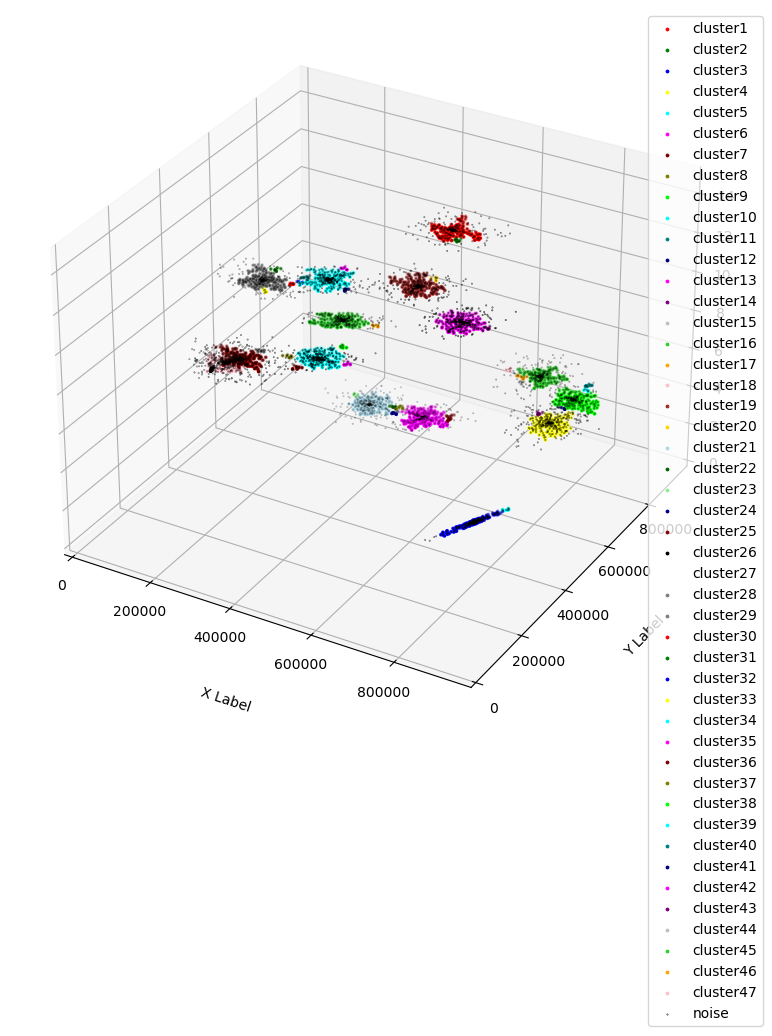

In [132]:
# DBSCAN result visualization

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Input Result of DBSCAN (eps = 10000, mp = 5)

cluster_num = 47
cluster_data = """
Cluster #1 => p2 p3 p4 p6 p7 p8 p10 p12 p13 p14 p15 p16 p17 p18 p19 p20 p21 p22 p23 p25 p26 p27 p28 p29 p30 p32 p33 p35 p36 p37 p38 p39 p40 p41 p42 p43 p44 p47 p49 p50 p51 p54 p55 p56 p57 p58 p62 p64 p65 p67 p69 p70 p71 p72 p74 p75 p77 p78 p79 p80 p81 p82 p83 p85 p86 p88 p90 p91 p92 p93 p94 p95 p96 p97 p98 p99 p100 p103 p104 p106 p109 p111 p112 p113 p114 p115 p116 p117 p118 p119 p120 p121 p125 p126 p127 p128 p129 p133 p134 p136 p137 p138 p139 p140 p141 p143 p144 p145 p146 p147 p148 p149 p150 p151 p152 p153 p155 p157 p159 p161 p162 p163 p166 p168 p169 p170 p171 p172 p174 p175 p177 p178 p179 p180 p182 p184 p186 p187 p188 p189 p190 p191 p193 p194 p195 p196 p198 p199 p200 p201 p202 p203 p204 p206 p207 p210 p211 p212 p213 p214 p215 p216 p217 p218 p219 p220 p221 p222 p223 p224 p225 p229 p230 p231 p232 p234 p237 p238 p240 p243 p244 p245 p246 p247 p249 p251 p252 p260 p261 p263 p265 p266 p267 p268 p269 p270 p271 p272 p273 p274 p276 p277 p278 p279 p280 p282 p283 p284 p285 p287 p288 p289 p290 p291 p292 p293 p294 p295 p297 p298 p299
Cluster #2 => p66 p87 p142 p183 p235 p300
Cluster #3 => p301 p302 p303 p304 p307 p308 p309 p310 p311 p312 p313 p314 p315 p316 p317 p318 p319 p320 p321 p322 p323 p324 p325 p326 p327 p329 p330 p331 p332 p333 p334 p335 p336 p337 p338 p339 p340 p341 p342 p343 p344 p345 p346 p347 p348 p349 p350 p351 p352 p353 p354 p356 p357 p358 p359 p360 p361 p362 p363 p364 p365 p366 p367 p368 p369 p370 p371 p372 p373 p374 p375 p376 p377 p378 p379 p381 p382 p385 p386 p387 p388 p389 p390 p391 p392 p393 p394 p395 p396 p397 p398 p399 p400 p401 p402 p403 p404 p405 p406 p407 p408 p409 p410 p411 p412 p413 p414 p415 p416 p417 p418 p419 p420 p421 p422 p423 p424 p425 p426 p427 p428 p429 p430 p431 p432 p433 p434 p435 p436 p437 p438 p439 p440 p441 p442 p443 p444 p446 p447 p448 p449 p450 p451 p452 p453 p454 p455 p456 p457 p458 p459 p460 p461 p462 p463 p464 p465 p466 p467 p468 p470 p471 p472 p473 p474 p475 p476 p477 p478 p479 p480 p481 p482 p484 p485 p486 p487 p488 p489 p490 p491 p492 p493 p494 p495 p496 p497 p499 p500 p501 p502 p503 p504 p505 p506 p508 p509 p510 p511 p512 p513 p514 p516 p517 p518 p519 p520 p521 p522 p523 p524 p525 p526 p527 p528 p529 p530 p531 p532 p533 p534 p535 p536 p537 p538 p539 p540 p541 p542 p543 p544 p545 p546 p547 p548 p549 p550 p551 p552 p553 p554 p555 p556 p557 p558 p559 p560 p561 p562 p563 p564 p565 p566 p568 p569 p570 p571 p572 p573 p574 p575 p576 p577 p578 p579 p580 p581 p582 p583 p584 p585 p586 p587 p588 p589 p590 p591 p592 p593 p594 p595 p596 p597 p598 p599 p601 p602 p603 p604 p605 p606 p607 p608 p609 p610 p611 p612 p613 p614 p615 p616
Cluster #4 => p380 p4301 p4302 p4303 p4304 p4306 p4308 p4309 p4311 p4312 p4314 p4315 p4316 p4318 p4320 p4321 p4323 p4324 p4325 p4328 p4329 p4330 p4331 p4332 p4335 p4336 p4337 p4338 p4339 p4342 p4343 p4344 p4345 p4346 p4347 p4348 p4349 p4350 p4352 p4353 p4354 p4355 p4356 p4357 p4358 p4359 p4360 p4361 p4362 p4363 p4364 p4365 p4366 p4368 p4369 p4370 p4371 p4372 p4373 p4374 p4376 p4377 p4378 p4379 p4380 p4381 p4382 p4383 p4384 p4385 p4388 p4389 p4390 p4391 p4392 p4393 p4394 p4395 p4396 p4397 p4398 p4399 p4401 p4402 p4403 p4404 p4406 p4407 p4408 p4409 p4410 p4411 p4413 p4414 p4415 p4416 p4417 p4418 p4419 p4420 p4421 p4422 p4423 p4424 p4426 p4428 p4430 p4431 p4434 p4435 p4436 p4437 p4438 p4439 p4440 p4441 p4442 p4443 p4444 p4445 p4446 p4448 p4449 p4450 p4453 p4454 p4456 p4457 p4458 p4459 p4461 p4463 p4464 p4465 p4466 p4467 p4468 p4470 p4471 p4473 p4476 p4477 p4478 p4479 p4481 p4482 p4483 p4484 p4487 p4488 p4490 p4491 p4494 p4495 p4496 p4497 p4498 p4499 p4500 p4501 p4502 p4504 p4505 p4506 p4507 p4508 p4509 p4512 p4514 p4515 p4517 p4521 p4522 p4523 p4524 p4525 p4527 p4528 p4530 p4531 p4532 p4533 p4534 p4535 p4536 p4537 p4538 p4539 p4540 p4542 p4544 p4545 p4546 p4547 p4549 p4550 p4553 p4554 p4555 p4556 p4557 p4558 p4561 p4562 p4564 p4565 p4566 p4568 p4569 p4570 p4571 p4575 p4578 p4581 p4582 p4584 p4585 p4586 p4587 p4588 p4589 p4591 p4592 p4593 p4594 p4595 p4596 p4597 p4598 p4600 p4602 p4603 p4605 p4606 p4607 p4609 p4610 p4611 p4612 p4614 p4615 p4618 p4619 p4621 p4622 p4623 p4626 p4627 p4629 p4630 p4631 p4632 p4633 p4634 p4635 p4636 p4638 p4639 p4640 p4641 p4642 p4643 p4644 p4646 p4647 p4648 p4649 p4650
Cluster #5 => p355 p445 p469 p483 p498 p507 p515
Cluster #6 => p617 p618 p619 p621 p623 p625 p626 p627 p628 p629 p630 p631 p632 p634 p636 p638 p639 p640 p641 p642 p643 p644 p645 p646 p647 p648 p649 p653 p655 p656 p657 p658 p659 p661 p662 p663 p666 p667 p668 p669 p671 p672 p673 p674 p675 p676 p677 p678 p679 p680 p682 p683 p684 p685 p686 p687 p688 p689 p690 p691 p693 p694 p695 p696 p697 p698 p699 p700 p701 p702 p703 p704 p705 p706 p707 p710 p711 p712 p714 p715 p716 p717 p718 p719 p720 p721 p722 p723 p724 p725 p726 p727 p729 p730 p731 p732 p733 p734 p735 p736 p737 p741 p743 p744 p745 p746 p747 p748 p749 p750 p751 p752 p753 p754 p755 p756 p757 p758 p760 p761 p762 p764 p766 p767 p768 p769 p770 p772 p773 p774 p775 p776 p777 p778 p779 p780 p781 p782 p783 p785 p786 p788 p789 p790 p792 p793 p794 p795 p796 p797 p798 p800 p801 p802 p804 p805 p806 p807 p808 p809 p812 p813 p814 p816 p817 p818 p820 p821 p822 p823 p824 p825 p826 p827 p828 p829 p830 p831 p832 p833 p834 p835 p836 p837 p838 p839 p840 p841 p842 p843 p844 p845 p846 p847 p848 p849 p850 p851 p852 p855 p858 p859 p861 p862 p863 p864 p865 p866 p867 p870 p871 p872 p873 p874 p875 p876 p878 p879 p882 p883 p885 p886 p887 p888 p890 p891 p893 p894 p895 p896 p897 p898 p899 p900 p901 p902 p903 p904 p905 p906 p907 p908 p909 p910 p911 p913 p915 p916 p917 p918 p923 p927 p928 p929 p930
Cluster #7 => p633 p660 p665 p713 p763 p799 p853 p869 p880 p884 p925
Cluster #8 => p635 p877 p892 p912 p919
Cluster #9 => p931 p932 p934 p935 p936 p938 p939 p940 p942 p943 p944 p945 p947 p948 p949 p950 p951 p952 p954 p957 p959 p961 p962 p963 p964 p966 p967 p969 p970 p971 p972 p973 p974 p975 p976 p977 p979 p981 p983 p984 p985 p986 p987 p988 p989 p990 p991 p992 p994 p995 p996 p998 p999 p1000 p1002 p1003 p1004 p1005 p1006 p1007 p1008 p1009 p1010 p1011 p1012 p1013 p1014 p1016 p1017 p1018 p1020 p1021 p1023 p1024 p1025 p1027 p1029 p1030 p1031 p1032 p1033 p1034 p1035 p1036 p1037 p1038 p1039 p1040 p1042 p1044 p1045 p1048 p1049 p1050 p1051 p1052 p1054 p1055 p1056 p1057 p1058 p1059 p1062 p1064 p1066 p1067 p1068 p1069 p1073 p1075 p1077 p1079 p1080 p1081 p1082 p1083 p1084 p1085 p1086 p1088 p1089 p1090 p1091 p1092 p1093 p1094 p1095 p1097 p1098 p1099 p1100 p1101 p1102 p1103 p1104 p1105 p1106 p1107 p1108 p1109 p1112 p1113 p1115 p1116 p1117 p1118 p1119 p1120 p1121 p1123 p1124 p1125 p1126 p1127 p1128 p1129 p1130 p1131 p1133 p1134 p1135 p1137 p1138 p1139 p1140 p1141 p1142 p1143 p1144 p1145 p1146 p1147 p1148 p1150 p1151 p1152 p1153 p1156 p1158 p1159 p1160 p1161 p1162 p1163 p1164 p1166 p1167 p1169 p1170 p1171 p1173 p1174 p1175 p1176 p1177 p1178 p1179 p1180 p1181 p1182 p1184 p1185 p1186 p1187 p1190 p1191 p1192 p1193 p1194 p1195 p1196 p1197 p1198 p1200 p1202 p1203 p1204 p1206 p1207 p1208 p1210 p1211 p1212 p1214 p1215 p1216 p1217 p1218 p1219 p1220 p1221 p1222 p1223 p1224 p1225 p1227 p1228 p1229 p1230 p1231 p1232 p1233 p1234 p1235 p1236 p1238 p1239 p1240 p1241 p1242 p1243 p1244 p1245 p1246 p1247 p1248
Cluster #10 => p937 p955 p1065 p1072 p1149 p1157
Cluster #11 => p956 p978 p1028 p1078 p1165 p1201
Cluster #12 => p980 p1019 p1136 p1154 p1188
Cluster #13 => p1249 p1250 p1251 p1252 p1253 p1254 p1255 p1256 p1260 p1261 p1262 p1263 p1265 p1266 p1267 p1269 p1270 p1271 p1272 p1273 p1274 p1275 p1276 p1277 p1279 p1280 p1282 p1283 p1284 p1286 p1287 p1289 p1290 p1292 p1293 p1294 p1295 p1297 p1298 p1299 p1300 p1301 p1302 p1303 p1304 p1305 p1306 p1307 p1308 p1309 p1310 p1311 p1312 p1313 p1314 p1315 p1316 p1317 p1318 p1319 p1320 p1321 p1322 p1324 p1325 p1326 p1327 p1328 p1329 p1330 p1331 p1333 p1335 p1336 p1337 p1338 p1339 p1340 p1341 p1342 p1344 p1345 p1346 p1347 p1348 p1349 p1350 p1352 p1353 p1354 p1355 p1356 p1357 p1358 p1359 p1360 p1361 p1362 p1363 p1364 p1365 p1366 p1368 p1369 p1370 p1371 p1372 p1373 p1374 p1375 p1376 p1377 p1379 p1380 p1382 p1383 p1385 p1386 p1387 p1388 p1389 p1390 p1391 p1392 p1394 p1395 p1396 p1397 p1398 p1400 p1401 p1402 p1403 p1408 p1409 p1411 p1412 p1413 p1414 p1415 p1416 p1417 p1419 p1420 p1421 p1422 p1423 p1425 p1426 p1429 p1430 p1431 p1432 p1434 p1435 p1437 p1438 p1439 p1440 p1441 p1442 p1443 p1444 p1445 p1446 p1448 p1449 p1451 p1452 p1453 p1454 p1455 p1456 p1457 p1458 p1459 p1460 p1461 p1462 p1463 p1465 p1467 p1468 p1469 p1472 p1473 p1474 p1475 p1476 p1478 p1479 p1480 p1481 p1482 p1483 p1484 p1486 p1487 p1488 p1489 p1491 p1493 p1494 p1495 p1496 p1497 p1498 p1499 p1500 p1501 p1502 p1503 p1504 p1505 p1506 p1508 p1509 p1510 p1513 p1515 p1517 p1518 p1520 p1521 p1522 p1523 p1524 p1525 p1526 p1527 p1528 p1529 p1530 p1531 p1533 p1535 p1536 p1538 p1539 p1540 p1541 p1542 p1543 p1544 p1545 p1547 p1548 p1549 p1550 p1551 p1552 p1553 p1554 p1555 p1556 p1557 p1558 p1559 p1560 p1561 p1562 p1563 p1565 p1566 p1568 p1570 p1572 p1573
Cluster #14 => p1343 p1351 p1404 p1466 p1537
Cluster #15 => p1264 p1291 p1471 p1511 p1571
Cluster #16 => p1574 p1575 p1577 p1578 p1579 p1581 p1583 p1584 p1586 p1587 p1588 p1589 p1590 p1591 p1592 p1594 p1595 p1596 p1598 p1599 p1600 p1601 p1602 p1603 p1604 p1605 p1606 p1607 p1608 p1609 p1610 p1611 p1612 p1613 p1614 p1615 p1616 p1617 p1618 p1619 p1620 p1621 p1622 p1624 p1625 p1626 p1627 p1628 p1629 p1630 p1631 p1632 p1633 p1634 p1635 p1637 p1638 p1639 p1640 p1641 p1642 p1643 p1644 p1645 p1646 p1647 p1648 p1649 p1651 p1652 p1653 p1654 p1655 p1656 p1657 p1658 p1659 p1660 p1662 p1663 p1664 p1665 p1668 p1669 p1670 p1671 p1672 p1673 p1674 p1676 p1677 p1678 p1679 p1680 p1681 p1682 p1684 p1685 p1686 p1687 p1688 p1689 p1690 p1691 p1692 p1693 p1694 p1695 p1697 p1698 p1699 p1700 p1701 p1704 p1705 p1706 p1707 p1708 p1709 p1710 p1711 p1712 p1714 p1715 p1716 p1717 p1718 p1719 p1720 p1721 p1722 p1723 p1725 p1726 p1727 p1728 p1729 p1731 p1732 p1733 p1734 p1736 p1737 p1738 p1739 p1740 p1742 p1743 p1744 p1745 p1746 p1747 p1748 p1749 p1750 p1751 p1752 p1753 p1755 p1756 p1757 p1758 p1759 p1760 p1761 p1762 p1763 p1764 p1765 p1766 p1767 p1768 p1769 p1770 p1771 p1772 p1773 p1775 p1776 p1777 p1778 p1779 p1780 p1781 p1782 p1784 p1785 p1786 p1787 p1788 p1789 p1790 p1791 p1792 p1793 p1794 p1795 p1796 p1797 p1798 p1799 p1800 p1802 p1803 p1804 p1805 p1806 p1808 p1809 p1810 p1811 p1812 p1813 p1814 p1815 p1816 p1817 p1818 p1819 p1820 p1821 p1822 p1823 p1824 p1826 p1827 p1829 p1830 p1831 p1832 p1833 p1834 p1835 p1836 p1837 p1838 p1839 p1840 p1841 p1842 p1843 p1844 p1845 p1846 p1847 p1848 p1849 p1850 p1851 p1852 p1853 p1854 p1855 p1856 p1857 p1858 p1859 p1860 p1861 p1862 p1863 p1864 p1865 p1866 p1868 p1869 p1870 p1871 p1872 p1873 p1874 p1875 p1876 p1877 p1878 p1879 p1880 p1881 p1882 p1883 p1884 p1885 p1887 p1889 p1890 p1891 p1892 p1893 p1894 p1896 p1899
Cluster #17 => p1650 p1675 p1730 p1735 p1807 p1895
Cluster #18 => p1900 p1901 p1902 p1905 p1907 p1908 p1909 p1910 p1911 p1912 p1913 p1915 p1916 p1917 p1918 p1919 p1921 p1922 p1923 p1924 p1925 p1928 p1929 p1930 p1931 p1932 p1933 p1934 p1935 p1936 p1937 p1939 p1942 p1943 p1944 p1945 p1946 p1947 p1948 p1949 p1950 p1951 p1952 p1953 p1954 p1956 p1957 p1959 p1960 p1961 p1963 p1964 p1965 p1966 p1967 p1968 p1969 p1970 p1971 p1972 p1973 p1974 p1975 p1977 p1978 p1979 p1980 p1982 p1985 p1987 p1988 p1989 p1990 p1991 p1993 p1995 p1998 p1999 p2000 p2001 p2002 p2003 p2004 p2006 p2007 p2008 p2009 p2010 p2011 p2012 p2013 p2015 p2016 p2017 p2018 p2019 p2020 p2022 p2023 p2024 p2025 p2026 p2027 p2028 p2029 p2030 p2031 p2032 p2034 p2035 p2036 p2038 p2039 p2040 p2041 p2042 p2043 p2045 p2046 p2048 p2050 p2051 p2052 p2053 p2054 p2056 p2058 p2059 p2060 p2061 p2062 p2063 p2064 p2065 p2067 p2068 p2069 p2071 p2072 p2074 p2076 p2078 p2079 p2080 p2082 p2083 p2085 p2086 p2087 p2089 p2090 p2093 p2094 p2095 p2096 p2098 p2099 p2100 p2101 p2102 p2104 p2105 p2106 p2107 p2108 p2109 p2110 p2111 p2112 p2113 p2114 p2115 p2116 p2117 p2118 p2119 p2120 p2121 p2123 p2126 p2127 p2128 p2129 p2130 p2132 p2133 p2134 p2136 p2137 p2140 p2142 p2143 p2144 p2146 p2147 p2148 p2149 p2150 p2151 p2152 p2153 p2154 p2156 p2157 p2158 p2159 p2160 p2165 p2166 p2167 p2169 p2170 p2172 p2174 p2175 p2176 p2177 p2178 p2181 p2182 p2183 p2184 p2185 p2186 p2187 p2188 p2189 p2190 p2191 p2192 p2193 p2196 p2198 p2199 p2201 p2202 p2204 p2205 p2206 p2207 p2208 p2210 p2211 p2213 p2214 p2216 p2217 p2218 p2219 p2220 p2221 p2222 p2223 p2224 p2225 p2226 p2227 p2228 p2230 p2231 p2232 p2233
Cluster #19 => p2235 p2236 p2237 p2238 p2239 p2240 p2241 p2242 p2243 p2245 p2246 p2247 p2248 p2249 p2252 p2253 p2254 p2255 p2256 p2257 p2258 p2259 p2260 p2261 p2263 p2264 p2265 p2266 p2267 p2268 p2269 p2270 p2271 p2272 p2273 p2274 p2275 p2276 p2277 p2278 p2282 p2283 p2285 p2286 p2288 p2289 p2290 p2291 p2292 p2294 p2295 p2296 p2299 p2300 p2302 p2303 p2304 p2306 p2308 p2309 p2310 p2311 p2312 p2314 p2315 p2316 p2317 p2318 p2319 p2321 p2323 p2324 p2325 p2328 p2329 p2330 p2331 p2332 p2336 p2337 p2338 p2339 p2340 p2341 p2342 p2344 p2345 p2346 p2347 p2348 p2349 p2350 p2351 p2352 p2353 p2354 p2356 p2357 p2358 p2359 p2361 p2362 p2364 p2365 p2366 p2367 p2368 p2369 p2370 p2372 p2373 p2374 p2376 p2379 p2381 p2382 p2383 p2384 p2385 p2386 p2387 p2390 p2391 p2392 p2393 p2394 p2395 p2396 p2397 p2398 p2400 p2401 p2404 p2405 p2406 p2407 p2408 p2411 p2412 p2413 p2414 p2415 p2416 p2418 p2419 p2422 p2423 p2424 p2425 p2426 p2427 p2428 p2429 p2430 p2431 p2432 p2433 p2436 p2438 p2439 p2440 p2442 p2443 p2444 p2446 p2447 p2449 p2450 p2451 p2452 p2453 p2455 p2456 p2457 p2458 p2459 p2461 p2462 p2463 p2465 p2466 p2467 p2469 p2470 p2472 p2473 p2475 p2477 p2478 p2480 p2481 p2482 p2483 p2484 p2486 p2487 p2488 p2489 p2491 p2492 p2493 p2494 p2495 p2496 p2497 p2500 p2501 p2502 p2503 p2507 p2508 p2510 p2511 p2512 p2513 p2514 p2516 p2517 p2519 p2520 p2521 p2522 p2523 p2524 p2525 p2527 p2528 p2529 p2530 p2531 p2533 p2536 p2537 p2539 p2542 p2544 p2545 p2546 p2547 p2548 p2549 p2550 p2551 p2552 p2553 p2554 p2555 p2557 p2558 p2559 p2560 p2561 p2562 p2563 p2564 p2565 p2566 p2567 p2568 p2569 p2571
Cluster #20 => p2298 p2307 p2454 p2505 p2515
Cluster #21 => p2574 p2575 p2576 p2577 p2578 p2579 p2580 p2581 p2583 p2585 p2586 p2587 p2588 p2589 p2590 p2592 p2593 p2594 p2595 p2596 p2598 p2599 p2601 p2602 p2605 p2606 p2607 p2609 p2610 p2611 p2612 p2613 p2615 p2616 p2617 p2618 p2619 p2620 p2621 p2623 p2624 p2625 p2626 p2627 p2628 p2629 p2630 p2631 p2634 p2635 p2636 p2637 p2638 p2639 p2640 p2642 p2644 p2646 p2649 p2650 p2651 p2652 p2653 p2654 p2656 p2657 p2658 p2659 p2661 p2662 p2665 p2666 p2668 p2669 p2670 p2671 p2672 p2674 p2675 p2679 p2680 p2681 p2682 p2683 p2684 p2685 p2686 p2687 p2690 p2692 p2693 p2695 p2696 p2698 p2699 p2700 p2701 p2702 p2705 p2706 p2707 p2708 p2709 p2710 p2712 p2716 p2717 p2719 p2723 p2724 p2725 p2726 p2728 p2730 p2732 p2733 p2734 p2735 p2736 p2738 p2739 p2740 p2741 p2742 p2743 p2744 p2746 p2747 p2748 p2749 p2750 p2751 p2753 p2754 p2755 p2758 p2760 p2761 p2762 p2763 p2764 p2765 p2766 p2767 p2768 p2769 p2772 p2773 p2774 p2775 p2776 p2777 p2778 p2779 p2780 p2781 p2783 p2784 p2786 p2787 p2788 p2789 p2790 p2792 p2793 p2794 p2796 p2797 p2798 p2799 p2800 p2801 p2802 p2803 p2804 p2806 p2807 p2809 p2810 p2811 p2813 p2815 p2816 p2817 p2818 p2819 p2820 p2821 p2822 p2823 p2824 p2825 p2826 p2827 p2828 p2829 p2830 p2831 p2832 p2833 p2834 p2835 p2836 p2837 p2838 p2839 p2841 p2843 p2844 p2845 p2847 p2848 p2849 p2850 p2851 p2853 p2854 p2855 p2856 p2859 p2860 p2861 p2863 p2864 p2865 p2866 p2867 p2868 p2869 p2870 p2871 p2872 p2873 p2875 p2876 p2879 p2881 p2883 p2884 p2885 p2887 p2888 p2889 p2890 p2891 p2892 p2894 p2895 p2897 p2898 p2899 p2900 p2901 p2902 p2903 p2904 p2905 p2906 p2907 p2908 p2909 p2910 p2911
Cluster #22 => p2591 p2603 p2673 p2704 p2814
Cluster #23 => p2643 p2645 p2647 p2727 p2874
Cluster #24 => p2597 p2676 p2731 p2757 p2882 p2896
Cluster #25 => p2913 p2915 p2917 p2919 p2920 p2921 p2922 p2923 p2924 p2927 p2930 p2931 p2935 p2936 p2937 p2938 p2939 p2942 p2943 p2944 p2946 p2949 p2954 p2955 p2956 p2958 p2959 p2961 p2962 p2963 p2964 p2965 p2966 p2967 p2968 p2969 p2970 p2971 p2972 p2973 p2974 p2975 p2978 p2980 p2982 p2987 p2990 p2993 p2994 p2995 p2996 p2997 p2998 p2999 p3000 p3001 p3002 p3003 p3004 p3005 p3006 p3008 p3009 p3010 p3011 p3012 p3013 p3015 p3016 p3018 p3020 p3021 p3022 p3023 p3024 p3025 p3026 p3027 p3028 p3029 p3031 p3032 p3033 p3034 p3036 p3037 p3038 p3040 p3041 p3042 p3043 p3044 p3047 p3048 p3049 p3052 p3053 p3061 p3062 p3063 p3064 p3065 p3070 p3071 p3072 p3074 p3077 p3078 p3079 p3081 p3083 p3085 p3086 p3087 p3088 p3089 p3090 p3091 p3092 p3093 p3094 p3096 p3097 p3099 p3100 p3101 p3103 p3104 p3107 p3108 p3109 p3111 p3113 p3114 p3116 p3118 p3120 p3121 p3122 p3123 p3125 p3126 p3127 p3128 p3129 p3130 p3131 p3132 p3137 p3143 p3144 p3146 p3148 p3149 p3150 p3151 p3152 p3154 p3157 p3159 p3161 p3162 p3167 p3168 p3169 p3170 p3171 p3172 p3174 p3175 p3177 p3178 p3179 p3180 p3181 p3183 p3186 p3188 p3189 p3190 p3191 p3192 p3195 p3196 p3197 p3198 p3199 p3201 p3202 p3205 p3206 p3208 p3211 p3212 p3213 p3214 p3215 p3216 p3218 p3219 p3220 p3223 p3225 p3227 p3228 p3229 p3230 p3232 p3234 p3235 p3236 p3237 p3238 p3239 p3240 p3241 p3245 p3247 p3248 p3249 p3251 p3252 p3254
Cluster #26 => p2925 p2926 p2933 p2948 p3075 p3106 p3184 p3210 p3226
Cluster #27 => p2932 p2985 p3066 p3221 p3243
Cluster #28 => p2979 p2981 p3039 p3080 p3098 p3112 p3124 p3140 p3163
Cluster #29 => p3255 p3256 p3257 p3258 p3259 p3260 p3261 p3263 p3264 p3265 p3266 p3267 p3269 p3270 p3274 p3275 p3276 p3280 p3281 p3282 p3283 p3285 p3286 p3287 p3288 p3289 p3290 p3291 p3292 p3293 p3294 p3295 p3297 p3298 p3299 p3300 p3301 p3303 p3304 p3305 p3306 p3307 p3308 p3309 p3310 p3312 p3313 p3315 p3318 p3320 p3322 p3323 p3324 p3326 p3327 p3328 p3329 p3330 p3331 p3332 p3333 p3334 p3335 p3336 p3337 p3338 p3339 p3340 p3343 p3344 p3345 p3346 p3347 p3349 p3351 p3352 p3353 p3354 p3355 p3356 p3357 p3358 p3360 p3361 p3362 p3363 p3364 p3365 p3366 p3367 p3368 p3370 p3371 p3372 p3374 p3375 p3376 p3377 p3379 p3380 p3383 p3384 p3385 p3387 p3388 p3389 p3391 p3392 p3394 p3395 p3396 p3397 p3398 p3399 p3400 p3401 p3402 p3403 p3404 p3405 p3406 p3407 p3409 p3411 p3412 p3414 p3415 p3416 p3417 p3418 p3421 p3422 p3423 p3424 p3425 p3426 p3429 p3430 p3431 p3433 p3434 p3436 p3437 p3439 p3440 p3442 p3443 p3444 p3447 p3448 p3449 p3450 p3451 p3452 p3453 p3454 p3455 p3457 p3461 p3462 p3463 p3467 p3469 p3470 p3471 p3472 p3473 p3474 p3476 p3477 p3478 p3480 p3481 p3482 p3483 p3486 p3487 p3488 p3489 p3490 p3491 p3492 p3494 p3495 p3496 p3497 p3498 p3499 p3500 p3503 p3504 p3505 p3507 p3508 p3509 p3510 p3511 p3514 p3516 p3517 p3518 p3520 p3522 p3523 p3524 p3525 p3527 p3528 p3531 p3532 p3533 p3534 p3535 p3536 p3537 p3538 p3539 p3540 p3542 p3543 p3544 p3545 p3546 p3547 p3548 p3549 p3551 p3552 p3553 p3554 p3555 p3556 p3559 p3560 p3561 p3565 p3566 p3567 p3568 p3569 p3570 p3571 p3572 p3573 p3574 p3576 p3577 p3578 p3579 p3580 p3581 p3583 p3584 p3585 p3587 p3589 p3590 p3591 p3592 p3593 p3594 p3595 p3597 p3598 p3600 p3601
Cluster #30 => p3319 p3350 p3459 p3460 p3530 p3541
Cluster #31 => p3311 p3321 p3378 p3408 p3419 p3493 p3512
Cluster #32 => p3325 p3386 p3479 p3519 p3521
Cluster #33 => p3278 p3381 p3393 p3432 p3484
Cluster #34 => p3602 p3603 p3604 p3605 p3607 p3608 p3609 p3610 p3611 p3612 p3613 p3614 p3615 p3616 p3617 p3620 p3621 p3622 p3623 p3624 p3627 p3628 p3629 p3630 p3631 p3632 p3635 p3636 p3637 p3638 p3639 p3640 p3642 p3643 p3644 p3645 p3646 p3648 p3649 p3650 p3651 p3652 p3653 p3654 p3655 p3656 p3657 p3658 p3659 p3660 p3663 p3664 p3665 p3666 p3667 p3668 p3669 p3670 p3673 p3674 p3675 p3676 p3678 p3679 p3680 p3681 p3682 p3683 p3684 p3687 p3688 p3690 p3691 p3693 p3694 p3695 p3697 p3698 p3699 p3700 p3701 p3702 p3703 p3704 p3705 p3706 p3707 p3708 p3712 p3714 p3715 p3716 p3717 p3718 p3719 p3720 p3721 p3722 p3723 p3724 p3725 p3726 p3727 p3728 p3729 p3730 p3732 p3733 p3734 p3735 p3736 p3737 p3738 p3739 p3740 p3741 p3742 p3743 p3744 p3746 p3747 p3748 p3749 p3750 p3751 p3752 p3753 p3755 p3756 p3758 p3759 p3760 p3762 p3763 p3764 p3765 p3767 p3768 p3769 p3771 p3772 p3773 p3774 p3776 p3777 p3778 p3779 p3780 p3781 p3782 p3784 p3785 p3786 p3787 p3788 p3790 p3792 p3794 p3795 p3796 p3797 p3799 p3800 p3803 p3804 p3805 p3806 p3807 p3808 p3809 p3810 p3812 p3813 p3814 p3815 p3816 p3817 p3818 p3820 p3821 p3822 p3823 p3824 p3825 p3828 p3829 p3830 p3831 p3832 p3835 p3837 p3838 p3839 p3840 p3841 p3842 p3843 p3844 p3845 p3847 p3848 p3849 p3850 p3851 p3852 p3853 p3855 p3857 p3858 p3859 p3860 p3861 p3863 p3865 p3866 p3867 p3868 p3869 p3870 p3871 p3872 p3873 p3875 p3876 p3877 p3878 p3880 p3881 p3882 p3883 p3884 p3885 p3886 p3887 p3888 p3889 p3891 p3892 p3894 p3895 p3896 p3897 p3898 p3899 p3900 p3901 p3902 p3903 p3905 p3906 p3907 p3908 p3909 p3910 p3912 p3913 p3916 p3917 p3918 p3919 p3920 p3921 p3922 p3923 p3925 p3927 p3928 p3930 p3931 p3932 p3935 p3936 p3937 p3938 p3939 p3940 p3941 p3942 p3943 p3944 p3945 p3946 p3947 p3948 p3949 p3950
Cluster #35 => p3606 p3634 p3686 p3709 p3874
Cluster #36 => p3677 p3689 p3696 p3710 p3770 p3826 p3827 p3833
Cluster #37 => p3662 p3791 p3846 p3879 p3904 p3929
Cluster #38 => p3672 p3775 p3862 p3864 p3924 p3926
Cluster #39 => p3951 p3952 p3953 p3954 p3955 p3958 p3959 p3961 p3962 p3963 p3964 p3966 p3967 p3968 p3970 p3972 p3973 p3974 p3975 p3976 p3977 p3978 p3979 p3980 p3982 p3983 p3984 p3985 p3987 p3988 p3989 p3990 p3991 p3992 p3993 p3994 p3995 p3996 p3997 p3998 p3999 p4000 p4001 p4002 p4003 p4004 p4005 p4006 p4008 p4009 p4011 p4012 p4013 p4014 p4015 p4016 p4017 p4018 p4019 p4020 p4021 p4022 p4023 p4024 p4025 p4027 p4028 p4029 p4030 p4032 p4033 p4034 p4035 p4036 p4038 p4039 p4040 p4041 p4044 p4045 p4046 p4047 p4048 p4049 p4050 p4051 p4052 p4053 p4054 p4055 p4056 p4057 p4058 p4059 p4060 p4061 p4063 p4064 p4065 p4066 p4067 p4068 p4069 p4070 p4071 p4075 p4076 p4077 p4078 p4079 p4080 p4081 p4082 p4084 p4086 p4087 p4088 p4089 p4090 p4092 p4093 p4094 p4098 p4099 p4100 p4101 p4102 p4103 p4104 p4105 p4106 p4107 p4108 p4109 p4110 p4111 p4112 p4113 p4115 p4116 p4117 p4118 p4119 p4120 p4123 p4124 p4125 p4126 p4128 p4129 p4131 p4132 p4133 p4134 p4135 p4136 p4137 p4138 p4140 p4141 p4144 p4145 p4146 p4147 p4148 p4150 p4151 p4152 p4153 p4154 p4155 p4156 p4157 p4158 p4160 p4162 p4163 p4164 p4166 p4167 p4169 p4170 p4173 p4174 p4175 p4176 p4178 p4179 p4180 p4181 p4182 p4184 p4186 p4187 p4188 p4189 p4190 p4191 p4192 p4195 p4196 p4197 p4198 p4199 p4200 p4201 p4202 p4203 p4204 p4206 p4207 p4208 p4209 p4210 p4211 p4212 p4213 p4215 p4216 p4217 p4218 p4219 p4220 p4221 p4222 p4223 p4224 p4225 p4226 p4227 p4228 p4229 p4230 p4231 p4232 p4233 p4235 p4237 p4239 p4242 p4244 p4245 p4246 p4249 p4250 p4255 p4256 p4257 p4258 p4259 p4260 p4262 p4264 p4265 p4266 p4267 p4268 p4269 p4270 p4271 p4272 p4273 p4274 p4275 p4276 p4277 p4279 p4280 p4281 p4282 p4283 p4286 p4287 p4288 p4289 p4290 p4291 p4292 p4293 p4294 p4295 p4297 p4298 p4299 p4300
Cluster #40 => p3957 p4010 p4096 p4139 p4143 p4149 p4165 p4254
Cluster #41 => p3969 p3971 p4031 p4161 p4241 p4248 p4263
Cluster #42 => p4072 p4130 p4142 p4171 p4177
Cluster #43 => p4433 p4460 p4492 p4510 p4580
Cluster #44 => p4653 p4713 p4864 p4883 p4909 p4993
Cluster #45 => p4655 p4656 p4657 p4658 p4659 p4663 p4664 p4666 p4668 p4669 p4670 p4671 p4672 p4673 p4674 p4675 p4681 p4682 p4683 p4684 p4685 p4686 p4687 p4688 p4689 p4690 p4691 p4692 p4693 p4695 p4696 p4698 p4699 p4700 p4701 p4703 p4705 p4706 p4707 p4708 p4709 p4711 p4712 p4714 p4715 p4716 p4718 p4719 p4721 p4724 p4725 p4726 p4727 p4728 p4729 p4730 p4731 p4732 p4733 p4734 p4736 p4737 p4738 p4740 p4743 p4745 p4746 p4747 p4748 p4749 p4750 p4751 p4753 p4754 p4755 p4757 p4758 p4759 p4760 p4761 p4762 p4764 p4765 p4766 p4767 p4768 p4769 p4770 p4771 p4772 p4773 p4774 p4775 p4777 p4779 p4780 p4781 p4782 p4783 p4784 p4785 p4787 p4788 p4791 p4793 p4794 p4796 p4797 p4803 p4804 p4805 p4806 p4807 p4809 p4810 p4811 p4812 p4815 p4816 p4817 p4818 p4819 p4820 p4821 p4823 p4824 p4825 p4826 p4827 p4828 p4829 p4830 p4832 p4838 p4839 p4840 p4841 p4842 p4843 p4844 p4845 p4846 p4847 p4848 p4849 p4850 p4851 p4852 p4854 p4855 p4856 p4858 p4859 p4860 p4861 p4862 p4863 p4865 p4866 p4867 p4868 p4869 p4870 p4872 p4873 p4875 p4878 p4879 p4880 p4881 p4882 p4884 p4885 p4886 p4887 p4888 p4889 p4891 p4892 p4893 p4894 p4895 p4896 p4897 p4898 p4899 p4902 p4903 p4907 p4910 p4911 p4912 p4913 p4914 p4915 p4918 p4919 p4920 p4921 p4922 p4923 p4924 p4925 p4927 p4929 p4931 p4932 p4933 p4934 p4935 p4937 p4939 p4940 p4941 p4943 p4944 p4946 p4947 p4949 p4951 p4952 p4954 p4955 p4959 p4960 p4961 p4962 p4963 p4964 p4966 p4967 p4968 p4969 p4970 p4971 p4972 p4973 p4975 p4976 p4981 p4983 p4984 p4987 p4988 p4989 p4990 p4991 p4994 p4996 p4997 p4998 p5000
Cluster #46 => p4744 p4763 p4792 p4795 p4834 p4836 p4904 p4950
Cluster #47 => p4789 p4799 p4835 p4900 p4999
"""

clusters = []
for line in cluster_data.strip().split("\n"):
    parts = line.split("=>")
    if len(parts) == 2:
        cluster_numbers = [int(p[1:]) for p in parts[1].strip().split()]
        clusters.append(cluster_numbers)

# Allocate x, y, z 
x = [[] for _ in range(cluster_num)]
y = [[] for _ in range(cluster_num)]
z = [[] for _ in range(cluster_num)]
noise_x = []
noise_y = []
noise_z = []

# Match Data
fp = open("./artset1.csv", 'r')

spots = fp.readlines() 
length = len(spots)

i = 0
x_max = 0
y_max = 0
z_max = 0

while i < length: 
    pt = spots[i].strip().split(',')
    if float(pt[1]) > x_max: x_max = float(pt[1])
    if float(pt[2]) > y_max: y_max = float(pt[2])
    if float(pt[3]) > z_max: z_max = float(pt[3])

    for k in range(cluster_num + 1):
        if (k == cluster_num):
            noise_x.append(float(pt[1]))
            noise_y.append(float(pt[2]))
            noise_z.append(float(pt[3]))
        elif ((i + 1) in clusters[k]):
            x[k].append(float(pt[1]))
            y[k].append(float(pt[2]))
            z[k].append(float(pt[3]))
    i += 1

fp.close()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = [
    "red", "green", "blue", "yellow", "cyan", "magenta", "maroon", "olive", "lime", "aqua", "teal", "navy",
    "fuchsia", "purple", "silver", "limegreen", "orange", "pink", "brown", "gold", "lightblue", "darkgreen", "lightgreen", 
    "darkblue", "darkred", "black", "white", "gray", "grey",  "red", "green", "blue", "yellow", "cyan", "magenta", "maroon", "olive", "lime", "aqua", "teal", "navy",
    "fuchsia", "purple", "silver", "limegreen", "orange", "pink", "brown", "gold", "lightblue", "darkgreen", "lightgreen", 
    "darkblue", "darkred", "black", "white", "gray", "grey"
]

for i in range(cluster_num):
    ax.scatter(x[i], y[i], z[i], c=colors[i], marker='o', s=3, label='cluster'+str(i + 1))

ax.scatter(noise_x, noise_y, noise_z, c='black', marker='o', s=0.1, label='noise')


ax.set_xlim([0, x_max])
ax.set_ylim([0, y_max])
ax.set_zlim([0, z_max])

ax.set_xlabel('X Label', labelpad=20)
ax.set_ylabel('Y Label', labelpad=20)
ax.set_zlabel('Z Label', labelpad=20)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout()

plt.show()



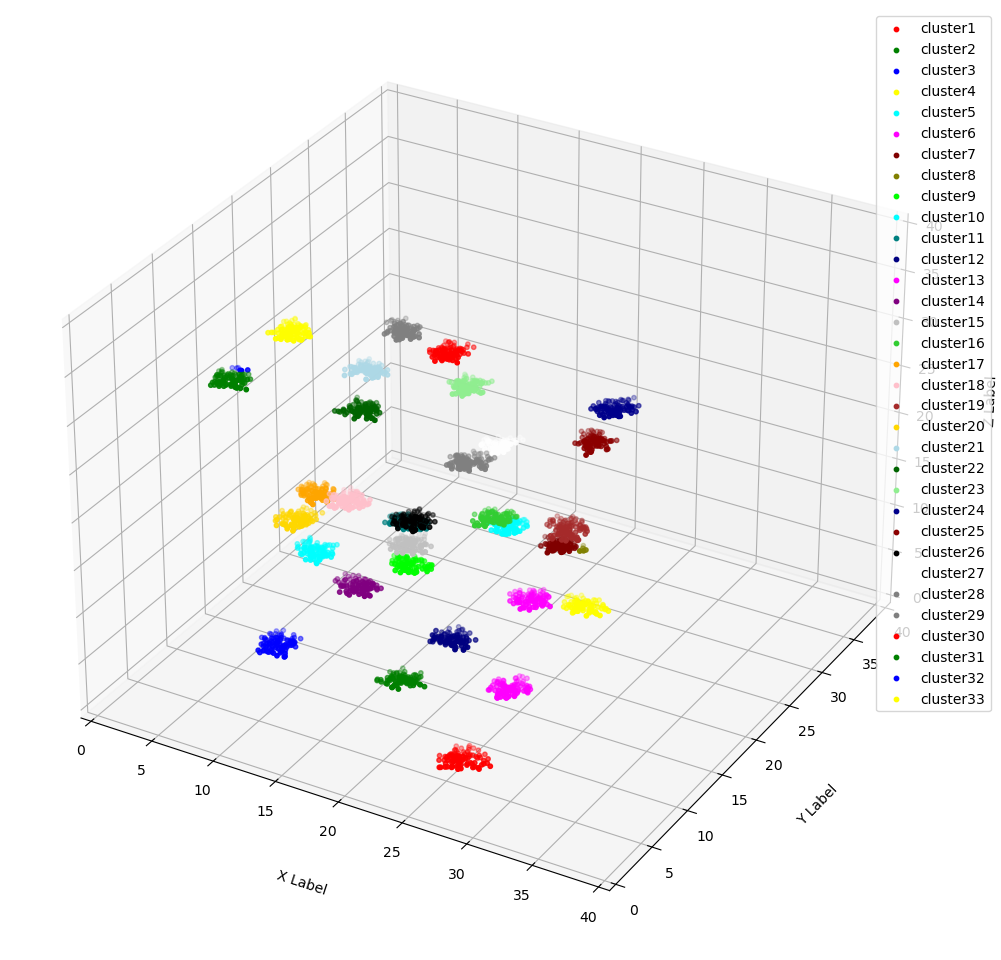

In [139]:
# DBSCAN result visualization

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Input Result of DBSCAN (eps = , mp = 5)

cluster_num = 33
cluster_data = """
Cluster #1 => p1 p2 p3 p4 p5 p6 p7 p8 p9 p10 p13 p14 p15 p17 p18 p19 p20 p21 p22 p23 p24 p25 p26 p27 p28 p29 p30 p31 p32 p33 p34 p35 p36 p37 p38 p39 p40 p41 p42 p43 p44 p45 p47 p48 p49 p50 p51 p52 p53 p54 p55 p56 p57 p58 p59 p60 p61 p62 p63 p65 p66 p67 p68 p69 p70 p71 p72 p73 p74 p75 p77 p78 p79 p80 p81 p82 p83 p84 p85 p86 p87 p88 p89 p90 p91 p92 p93 p94 p95 p96 p97 p98 p99 p100
Cluster #2 => p101 p102 p103 p104 p105 p106 p107 p108 p110 p111 p112 p113 p114 p115 p116 p118 p119 p120 p121 p122 p123 p124 p125 p128 p129 p130 p132 p133 p134 p135 p136 p138 p139 p140 p141 p142 p143 p144 p145 p146 p147 p148 p149 p150 p151 p152 p154 p155 p156 p157 p158 p159 p161 p162 p164 p165 p166 p167 p168 p169 p170 p171 p172 p173 p174 p176 p177 p178 p179 p180 p182 p183 p184 p185 p187 p188 p189 p190 p191 p192 p193 p194 p196 p197 p198 p199 p200
Cluster #3 => p201 p202 p203 p204 p205 p206 p207 p208 p209 p210 p211 p212 p213 p214 p215 p216 p217 p218 p219 p220 p221 p222 p223 p224 p225 p226 p227 p228 p229 p230 p231 p232 p233 p234 p235 p236 p237 p238 p240 p241 p242 p243 p244 p245 p246 p247 p248 p251 p252 p253 p254 p255 p256 p257 p258 p259 p261 p262 p263 p264 p265 p266 p267 p268 p269 p270 p271 p273 p274 p275 p276 p277 p278 p279 p280 p281 p282 p283 p285 p286 p287 p288 p289 p290 p291 p292 p293 p294 p295 p296 p297 p298 p299 p300
Cluster #4 => p301 p302 p303 p304 p305 p306 p307 p308 p310 p311 p313 p314 p315 p316 p317 p318 p319 p320 p321 p322 p323 p324 p325 p327 p328 p329 p330 p331 p332 p333 p334 p335 p336 p337 p338 p339 p340 p341 p343 p344 p345 p346 p347 p348 p349 p351 p352 p354 p355 p356 p357 p358 p359 p360 p361 p362 p363 p364 p365 p366 p367 p368 p369 p370 p372 p373 p374 p375 p376 p378 p379 p380 p381 p382 p383 p384 p385 p386 p388 p389 p390 p391 p392 p393 p394 p395 p396 p397 p398 p399 p400
Cluster #5 => p401 p402 p403 p404 p406 p407 p408 p409 p410 p412 p413 p414 p415 p416 p417 p418 p419 p420 p421 p422 p423 p424 p425 p426 p427 p428 p429 p430 p431 p433 p434 p435 p436 p437 p438 p439 p440 p441 p442 p443 p444 p445 p446 p447 p448 p449 p450 p451 p452 p453 p454 p455 p456 p459 p460 p461 p462 p463 p464 p465 p467 p469 p470 p472 p474 p475 p476 p477 p478 p479 p480 p481 p482 p483 p484 p485 p486 p487 p488 p489 p491 p492 p493 p494 p495 p497 p498 p500
Cluster #6 => p501 p502 p503 p504 p505 p506 p507 p508 p509 p510 p512 p513 p514 p515 p516 p517 p518 p519 p520 p521 p522 p524 p526 p527 p528 p529 p530 p531 p532 p533 p534 p535 p536 p537 p538 p539 p540 p541 p542 p543 p544 p545 p546 p547 p548 p549 p550 p551 p553 p554 p555 p556 p557 p558 p559 p560 p561 p562 p563 p564 p565 p566 p567 p568 p570 p571 p572 p573 p574 p575 p576 p577 p579 p580 p581 p582 p583 p584 p585 p587 p588 p589 p590 p591 p592 p593 p594 p595 p596 p597 p598 p599 p600
Cluster #7 => p601 p602 p604 p605 p607 p608 p609 p611 p613 p614 p615 p617 p619 p620 p621 p622 p623 p624 p625 p626 p627 p629 p630 p632 p633 p634 p635 p636 p638 p639 p640 p641 p642 p643 p645 p646 p647 p648 p649 p650 p651 p653 p654 p655 p657 p658 p659 p663 p664 p665 p666 p667 p668 p669 p671 p672 p673 p674 p675 p676 p677 p678 p679 p681 p682 p683 p684 p685 p686 p687 p688 p689 p690 p691 p692 p693 p694 p695 p696 p698 p699 p700
Cluster #8 => p610 p612 p618 p680 p697
Cluster #9 => p701 p702 p703 p704 p705 p706 p707 p709 p710 p711 p712 p713 p715 p716 p717 p719 p720 p721 p722 p723 p725 p726 p727 p729 p730 p731 p732 p733 p734 p735 p737 p738 p739 p740 p741 p743 p744 p745 p746 p747 p748 p749 p750 p751 p752 p753 p754 p755 p757 p758 p759 p760 p762 p763 p764 p765 p766 p767 p768 p769 p770 p771 p772 p773 p774 p775 p777 p778 p779 p780 p781 p783 p784 p785 p786 p787 p788 p789 p790 p791 p794 p795 p796 p797 p798 p799
Cluster #10 => p801 p802 p803 p804 p805 p806 p807 p808 p809 p810 p811 p812 p813 p814 p815 p816 p818 p819 p820 p821 p822 p823 p824 p825 p827 p828 p829 p830 p831 p832 p833 p834 p835 p836 p837 p838 p839 p840 p841 p842 p843 p844 p846 p847 p848 p849 p850 p851 p852 p853 p854 p855 p856 p857 p859 p860 p861 p862 p863 p864 p865 p866 p867 p868 p869 p870 p871 p872 p873 p874 p875 p876 p877 p878 p879 p880 p881 p882 p883 p884 p885 p886 p887 p888 p889 p890 p891 p892 p893 p894 p895 p896 p897 p898 p899 p900
Cluster #11 => p901 p902 p904 p906 p907 p908 p909 p910 p911 p912 p913 p914 p915 p916 p917 p918 p919 p920 p921 p922 p924 p925 p926 p927 p928 p929 p930 p931 p932 p933 p934 p935 p936 p937 p938 p939 p940 p941 p943 p944 p945 p946 p947 p948 p949 p950 p951 p952 p953 p954 p955 p956 p957 p958 p959 p960 p961 p962 p963 p964 p965 p966 p967 p968 p969 p970 p971 p972 p973 p974 p975 p976 p979 p980 p981 p982 p983 p984 p985 p986 p987 p989 p990 p991 p993 p994 p995 p996 p997 p998 p999 p1000
Cluster #12 => p1001 p1002 p1003 p1004 p1005 p1006 p1007 p1008 p1009 p1010 p1011 p1012 p1014 p1015 p1016 p1017 p1018 p1019 p1020 p1021 p1022 p1023 p1025 p1026 p1027 p1028 p1029 p1030 p1031 p1032 p1033 p1034 p1035 p1036 p1037 p1038 p1039 p1040 p1041 p1042 p1043 p1044 p1045 p1046 p1047 p1048 p1049 p1051 p1052 p1053 p1054 p1055 p1056 p1057 p1058 p1059 p1060 p1061 p1062 p1063 p1064 p1065 p1068 p1069 p1070 p1071 p1072 p1073 p1076 p1077 p1078 p1079 p1080 p1081 p1084 p1085 p1086 p1087 p1089 p1090 p1091 p1092 p1094 p1095 p1097 p1098 p1099 p1100
Cluster #13 => p1101 p1102 p1103 p1104 p1105 p1106 p1107 p1108 p1109 p1110 p1112 p1113 p1114 p1115 p1116 p1118 p1119 p1120 p1121 p1122 p1123 p1124 p1125 p1126 p1127 p1128 p1129 p1130 p1131 p1133 p1134 p1136 p1137 p1138 p1139 p1140 p1141 p1143 p1144 p1145 p1146 p1147 p1148 p1150 p1151 p1152 p1153 p1154 p1156 p1158 p1159 p1160 p1161 p1162 p1163 p1164 p1165 p1166 p1167 p1168 p1169 p1170 p1172 p1173 p1174 p1176 p1177 p1178 p1179 p1180 p1181 p1182 p1183 p1184 p1185 p1186 p1187 p1189 p1190 p1191 p1192 p1193 p1194 p1195 p1196 p1197 p1198 p1199 p1200
Cluster #14 => p1201 p1202 p1204 p1205 p1206 p1207 p1208 p1209 p1212 p1213 p1214 p1215 p1216 p1217 p1218 p1220 p1221 p1222 p1223 p1224 p1225 p1227 p1228 p1229 p1230 p1231 p1232 p1233 p1235 p1236 p1237 p1238 p1239 p1241 p1242 p1243 p1244 p1245 p1246 p1247 p1249 p1250 p1251 p1252 p1253 p1254 p1255 p1257 p1258 p1259 p1260 p1261 p1262 p1263 p1264 p1265 p1266 p1267 p1268 p1269 p1270 p1271 p1272 p1273 p1274 p1275 p1276 p1277 p1278 p1279 p1280 p1281 p1282 p1283 p1284 p1285 p1286 p1287 p1288 p1290 p1291 p1292 p1293 p1294 p1295 p1296 p1297 p1298 p1299 p1300
Cluster #15 => p1301 p1302 p1303 p1304 p1305 p1306 p1307 p1308 p1309 p1311 p1312 p1313 p1314 p1315 p1316 p1317 p1318 p1319 p1320 p1321 p1322 p1323 p1324 p1325 p1326 p1327 p1328 p1329 p1331 p1332 p1333 p1334 p1335 p1336 p1337 p1338 p1341 p1342 p1343 p1344 p1345 p1346 p1347 p1348 p1349 p1350 p1351 p1352 p1353 p1354 p1355 p1356 p1357 p1359 p1360 p1361 p1362 p1363 p1364 p1365 p1367 p1368 p1369 p1370 p1371 p1372 p1373 p1374 p1375 p1376 p1377 p1378 p1379 p1380 p1381 p1382 p1383 p1384 p1386 p1387 p1388 p1390 p1391 p1393 p1395 p1396 p1397 p1398 p1399 p1400
Cluster #16 => p1401 p1402 p1403 p1404 p1405 p1406 p1407 p1408 p1409 p1410 p1411 p1412 p1413 p1414 p1415 p1416 p1417 p1418 p1420 p1422 p1424 p1425 p1426 p1428 p1429 p1430 p1431 p1432 p1433 p1434 p1435 p1436 p1437 p1438 p1439 p1440 p1441 p1442 p1443 p1444 p1445 p1446 p1447 p1448 p1449 p1450 p1451 p1452 p1453 p1454 p1455 p1457 p1458 p1459 p1460 p1461 p1462 p1463 p1464 p1466 p1467 p1468 p1469 p1470 p1471 p1472 p1473 p1474 p1476 p1477 p1478 p1479 p1480 p1481 p1482 p1483 p1484 p1485 p1486 p1487 p1488 p1489 p1490 p1491 p1492 p1493 p1494 p1497 p1498 p1499 p1500
Cluster #17 => p1501 p1502 p1503 p1505 p1506 p1507 p1508 p1509 p1511 p1512 p1513 p1514 p1515 p1516 p1517 p1518 p1519 p1520 p1521 p1522 p1523 p1524 p1525 p1526 p1527 p1528 p1529 p1530 p1532 p1533 p1534 p1535 p1536 p1537 p1538 p1539 p1540 p1541 p1542 p1543 p1544 p1545 p1546 p1547 p1548 p1549 p1550 p1551 p1552 p1553 p1554 p1555 p1556 p1557 p1558 p1559 p1560 p1561 p1562 p1563 p1564 p1565 p1566 p1567 p1568 p1569 p1570 p1571 p1573 p1574 p1575 p1576 p1577 p1578 p1579 p1580 p1581 p1582 p1583 p1584 p1585 p1586 p1587 p1588 p1589 p1590 p1591 p1592 p1593 p1594 p1595 p1596 p1597 p1598 p1599 p1600
Cluster #18 => p1601 p1602 p1603 p1605 p1607 p1608 p1609 p1610 p1611 p1612 p1613 p1614 p1615 p1616 p1617 p1618 p1619 p1620 p1621 p1622 p1623 p1624 p1625 p1626 p1627 p1628 p1629 p1630 p1631 p1632 p1633 p1634 p1635 p1636 p1637 p1638 p1639 p1640 p1641 p1642 p1643 p1644 p1645 p1646 p1647 p1648 p1649 p1650 p1651 p1652 p1653 p1654 p1655 p1656 p1657 p1658 p1659 p1660 p1662 p1663 p1664 p1665 p1666 p1667 p1668 p1669 p1670 p1671 p1672 p1673 p1674 p1675 p1676 p1677 p1678 p1681 p1682 p1683 p1684 p1685 p1686 p1687 p1688 p1689 p1690 p1691 p1692 p1694 p1695 p1697 p1698 p1699 p1700
Cluster #19 => p1701 p1702 p1703 p1704 p1705 p1706 p1707 p1708 p1709 p1710 p1711 p1712 p1714 p1715 p1716 p1718 p1719 p1720 p1721 p1722 p1723 p1724 p1725 p1726 p1727 p1728 p1729 p1730 p1731 p1732 p1733 p1734 p1735 p1736 p1737 p1738 p1739 p1740 p1741 p1742 p1743 p1744 p1745 p1746 p1747 p1749 p1750 p1751 p1752 p1754 p1755 p1756 p1757 p1758 p1759 p1760 p1761 p1762 p1764 p1765 p1766 p1767 p1768 p1769 p1770 p1771 p1774 p1775 p1776 p1777 p1778 p1779 p1780 p1781 p1782 p1783 p1784 p1785 p1786 p1787 p1788 p1789 p1790 p1791 p1792 p1793 p1794 p1795 p1796 p1797 p1798 p1799 p1800
Cluster #20 => p1801 p1802 p1803 p1804 p1805 p1806 p1807 p1809 p1810 p1811 p1812 p1813 p1814 p1816 p1817 p1818 p1819 p1820 p1821 p1822 p1823 p1824 p1825 p1826 p1827 p1828 p1829 p1830 p1831 p1832 p1833 p1834 p1835 p1836 p1837 p1838 p1840 p1841 p1842 p1843 p1844 p1845 p1846 p1848 p1849 p1850 p1851 p1852 p1853 p1854 p1855 p1856 p1858 p1859 p1860 p1861 p1862 p1863 p1865 p1867 p1868 p1869 p1870 p1871 p1872 p1873 p1874 p1876 p1877 p1878 p1879 p1880 p1881 p1882 p1883 p1884 p1885 p1886 p1887 p1888 p1889 p1890 p1891 p1892 p1893 p1894 p1895 p1896 p1897 p1898 p1899
Cluster #21 => p1901 p1902 p1903 p1904 p1905 p1906 p1907 p1908 p1911 p1912 p1913 p1914 p1915 p1916 p1917 p1918 p1920 p1922 p1923 p1924 p1925 p1926 p1927 p1928 p1929 p1930 p1931 p1932 p1933 p1934 p1935 p1936 p1937 p1938 p1939 p1940 p1942 p1943 p1944 p1945 p1946 p1947 p1948 p1949 p1950 p1951 p1952 p1953 p1954 p1955 p1956 p1957 p1958 p1960 p1961 p1962 p1963 p1964 p1965 p1966 p1967 p1969 p1970 p1971 p1972 p1973 p1974 p1975 p1976 p1977 p1978 p1979 p1980 p1981 p1982 p1983 p1984 p1986 p1987 p1988 p1989 p1990 p1991 p1992 p1993 p1994 p1995 p1996 p1997 p1998 p1999 p2000
Cluster #22 => p2001 p2003 p2004 p2005 p2006 p2007 p2009 p2010 p2011 p2012 p2013 p2014 p2016 p2017 p2018 p2019 p2020 p2022 p2023 p2024 p2025 p2026 p2027 p2028 p2029 p2030 p2031 p2032 p2033 p2034 p2035 p2036 p2037 p2038 p2039 p2040 p2041 p2042 p2043 p2044 p2045 p2046 p2047 p2048 p2049 p2050 p2051 p2052 p2053 p2054 p2055 p2056 p2057 p2058 p2059 p2060 p2061 p2063 p2064 p2065 p2066 p2067 p2068 p2069 p2070 p2072 p2073 p2074 p2076 p2077 p2078 p2079 p2080 p2081 p2084 p2085 p2086 p2087 p2088 p2089 p2091 p2092 p2094 p2095 p2096 p2097 p2098 p2099 p2100
Cluster #23 => p2101 p2102 p2103 p2104 p2105 p2106 p2107 p2108 p2109 p2110 p2111 p2112 p2113 p2114 p2115 p2117 p2118 p2119 p2120 p2121 p2122 p2124 p2125 p2126 p2127 p2128 p2131 p2133 p2134 p2136 p2137 p2138 p2139 p2140 p2141 p2142 p2143 p2144 p2145 p2146 p2147 p2148 p2150 p2151 p2152 p2153 p2154 p2156 p2157 p2158 p2159 p2160 p2161 p2162 p2163 p2164 p2165 p2166 p2167 p2168 p2169 p2170 p2171 p2172 p2173 p2174 p2175 p2177 p2178 p2179 p2180 p2181 p2182 p2183 p2184 p2185 p2186 p2187 p2188 p2189 p2190 p2191 p2193 p2194 p2195 p2196 p2197 p2198 p2199 p2200
Cluster #24 => p2201 p2202 p2203 p2204 p2205 p2206 p2207 p2208 p2209 p2210 p2211 p2212 p2213 p2214 p2215 p2216 p2218 p2221 p2222 p2223 p2224 p2225 p2226 p2227 p2228 p2229 p2231 p2232 p2233 p2235 p2236 p2237 p2238 p2239 p2240 p2241 p2242 p2243 p2244 p2245 p2246 p2248 p2249 p2250 p2251 p2252 p2253 p2254 p2255 p2256 p2257 p2258 p2259 p2260 p2261 p2262 p2263 p2264 p2265 p2267 p2268 p2269 p2270 p2271 p2272 p2273 p2274 p2275 p2277 p2278 p2279 p2280 p2282 p2283 p2284 p2285 p2287 p2288 p2289 p2291 p2292 p2293 p2294 p2295 p2296 p2297 p2298 p2299 p2300
Cluster #25 => p2301 p2302 p2303 p2304 p2306 p2307 p2308 p2309 p2310 p2311 p2312 p2314 p2315 p2316 p2317 p2318 p2319 p2320 p2321 p2322 p2323 p2325 p2326 p2327 p2328 p2330 p2331 p2332 p2333 p2334 p2335 p2336 p2338 p2339 p2340 p2341 p2342 p2343 p2344 p2345 p2346 p2347 p2349 p2350 p2351 p2352 p2353 p2354 p2355 p2356 p2357 p2358 p2359 p2360 p2361 p2362 p2363 p2364 p2365 p2366 p2367 p2368 p2369 p2370 p2371 p2372 p2373 p2374 p2375 p2376 p2377 p2378 p2379 p2380 p2381 p2382 p2383 p2384 p2386 p2387 p2388 p2390 p2391 p2392 p2393 p2394 p2395 p2396 p2398 p2400
Cluster #26 => p2401 p2402 p2403 p2404 p2405 p2407 p2408 p2409 p2410 p2411 p2412 p2413 p2414 p2415 p2416 p2417 p2418 p2420 p2421 p2422 p2423 p2424 p2425 p2426 p2427 p2428 p2429 p2430 p2431 p2432 p2433 p2434 p2435 p2436 p2437 p2439 p2440 p2441 p2442 p2443 p2444 p2445 p2446 p2448 p2449 p2450 p2451 p2452 p2453 p2454 p2455 p2456 p2457 p2458 p2459 p2460 p2461 p2462 p2463 p2464 p2465 p2467 p2468 p2469 p2470 p2471 p2472 p2473 p2475 p2476 p2477 p2478 p2480 p2482 p2483 p2484 p2485 p2486 p2488 p2489 p2490 p2491 p2492 p2493 p2494 p2495 p2496 p2497 p2498 p2500
Cluster #27 => p2501 p2502 p2503 p2505 p2506 p2508 p2509 p2510 p2511 p2512 p2513 p2514 p2515 p2516 p2517 p2518 p2519 p2520 p2521 p2522 p2523 p2524 p2525 p2526 p2527 p2528 p2530 p2531 p2532 p2534 p2535 p2536 p2537 p2538 p2539 p2543 p2544 p2545 p2546 p2547 p2548 p2549 p2552 p2553 p2555 p2556 p2557 p2558 p2559 p2560 p2561 p2564 p2565 p2566 p2567 p2568 p2569 p2570 p2571 p2572 p2574 p2575 p2577 p2579 p2580 p2582 p2583 p2584 p2585 p2586 p2587 p2588 p2589 p2590 p2592 p2594 p2595 p2596 p2597 p2599 p2600
Cluster #28 => p2601 p2602 p2603 p2604 p2605 p2606 p2607 p2608 p2609 p2610 p2611 p2612 p2613 p2614 p2615 p2616 p2618 p2619 p2620 p2621 p2622 p2623 p2624 p2625 p2626 p2627 p2628 p2630 p2631 p2632 p2633 p2634 p2635 p2636 p2637 p2638 p2639 p2640 p2641 p2642 p2643 p2644 p2645 p2647 p2648 p2649 p2650 p2651 p2652 p2653 p2654 p2655 p2656 p2657 p2658 p2659 p2660 p2661 p2662 p2663 p2664 p2666 p2667 p2668 p2669 p2670 p2671 p2672 p2673 p2674 p2675 p2676 p2677 p2678 p2679 p2680 p2681 p2682 p2683 p2684 p2685 p2686 p2687 p2688 p2689 p2690 p2691 p2692 p2693 p2694 p2695 p2696 p2697 p2698 p2699 p2700
Cluster #29 => p2701 p2702 p2703 p2704 p2705 p2706 p2707 p2708 p2710 p2711 p2713 p2714 p2715 p2716 p2718 p2719 p2720 p2721 p2722 p2723 p2724 p2725 p2726 p2727 p2728 p2729 p2730 p2731 p2733 p2734 p2735 p2736 p2737 p2738 p2739 p2740 p2741 p2742 p2743 p2744 p2745 p2746 p2747 p2748 p2749 p2750 p2751 p2752 p2753 p2754 p2755 p2756 p2757 p2759 p2760 p2761 p2762 p2764 p2765 p2766 p2767 p2768 p2769 p2770 p2771 p2772 p2773 p2774 p2775 p2776 p2777 p2778 p2779 p2780 p2781 p2782 p2783 p2784 p2786 p2787 p2788 p2789 p2790 p2791 p2794 p2795 p2796 p2797 p2798 p2799 p2800
Cluster #30 => p2801 p2802 p2803 p2804 p2805 p2807 p2808 p2809 p2810 p2811 p2813 p2814 p2815 p2816 p2818 p2819 p2820 p2821 p2822 p2823 p2824 p2825 p2826 p2828 p2829 p2830 p2831 p2832 p2833 p2834 p2835 p2836 p2837 p2838 p2839 p2840 p2841 p2842 p2843 p2844 p2845 p2846 p2847 p2848 p2849 p2850 p2851 p2852 p2853 p2854 p2855 p2856 p2857 p2858 p2859 p2860 p2861 p2863 p2864 p2865 p2866 p2867 p2868 p2869 p2870 p2871 p2872 p2873 p2874 p2875 p2876 p2877 p2878 p2879 p2880 p2881 p2882 p2883 p2885 p2886 p2887 p2888 p2889 p2890 p2891 p2893 p2894 p2895 p2896 p2897 p2898 p2899 p2900
Cluster #31 => p2902 p2903 p2904 p2905 p2906 p2907 p2908 p2909 p2910 p2911 p2912 p2913 p2914 p2915 p2916 p2917 p2918 p2919 p2921 p2922 p2923 p2924 p2925 p2926 p2927 p2928 p2929 p2930 p2931 p2932 p2933 p2934 p2935 p2936 p2937 p2938 p2941 p2942 p2943 p2944 p2945 p2946 p2947 p2948 p2949 p2950 p2951 p2952 p2953 p2954 p2955 p2956 p2957 p2958 p2959 p2960 p2961 p2962 p2963 p2964 p2965 p2966 p2967 p2968 p2969 p2970 p2971 p2972 p2973 p2974 p2975 p2976 p2977 p2978 p2980 p2981 p2982 p2983 p2984 p2986 p2987 p2988 p2989 p2990 p2991 p2993 p2994 p2995 p2996 p2997 p2998 p3000
Cluster #32 => p2920 p2939 p2979 p2985 p2992 p2999
Cluster #33 => p3001 p3002 p3003 p3004 p3005 p3006 p3007 p3008 p3009 p3010 p3011 p3012 p3013 p3015 p3016 p3017 p3018 p3019 p3020 p3021 p3022 p3023 p3024 p3026 p3027 p3028 p3029 p3030 p3031 p3032 p3033 p3034 p3035 p3036 p3037 p3038 p3039 p3040 p3041 p3042 p3043 p3044 p3045 p3046 p3047 p3048 p3049 p3050 p3051 p3052 p3053 p3054 p3055 p3056 p3057 p3058 p3059 p3060 p3061 p3062 p3063 p3064 p3065 p3066 p3067 p3068 p3070 p3071 p3073 p3074 p3075 p3076 p3077 p3078 p3079 p3080 p3081 p3082 p3083 p3084 p3085 p3086 p3087 p3088 p3089 p3090 p3091 p3092 p3093 p3094 p3095 p3096 p3097 p3098 p3099
"""

clusters = []
for line in cluster_data.strip().split("\n"):
    parts = line.split("=>")
    if len(parts) == 2:
        cluster_numbers = [int(p[1:]) for p in parts[1].strip().split()]
        clusters.append(cluster_numbers)

# Allocate x, y, z 
x = [[] for _ in range(cluster_num)]
y = [[] for _ in range(cluster_num)]
z = [[] for _ in range(cluster_num)]
noise_x = []
noise_y = []
noise_z = []

# Match Data
fp = open("./artd-31.csv", 'r')

spots = fp.readlines() 
length = len(spots)

i = 0
x_max = 0
y_max = 0
z_max = 0

while i < length: 
    pt = spots[i].strip().split(',')
    if float(pt[1]) > x_max: x_max = float(pt[1])
    if float(pt[2]) > y_max: y_max = float(pt[2])
    if float(pt[3]) > z_max: z_max = float(pt[3])

    for k in range(cluster_num + 1):
        if (k == cluster_num):
            noise_x.append(float(pt[1]))
            noise_y.append(float(pt[2]))
            noise_z.append(float(pt[3]))
        elif ((i + 1) in clusters[k]):
            x[k].append(float(pt[1]))
            y[k].append(float(pt[2]))
            z[k].append(float(pt[3]))
    i += 1

fp.close()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = [
    "red", "green", "blue", "yellow", "cyan", "magenta", "maroon", "olive", "lime", "aqua", "teal", "navy",
    "fuchsia", "purple", "silver", "limegreen", "orange", "pink", "brown", "gold", "lightblue", "darkgreen", "lightgreen", 
    "darkblue", "darkred", "black", "white", "gray", "grey",  "red", "green", "blue", "yellow", "cyan", "magenta", "maroon", "olive", "lime", "aqua", "teal", "navy",
    "fuchsia", "purple", "silver", "limegreen", "orange", "pink", "brown", "gold", "lightblue", "darkgreen", "lightgreen", 
    "darkblue", "darkred", "black", "white", "gray", "grey"
]

for i in range(cluster_num):
    ax.scatter(x[i], y[i], z[i], c=colors[i], marker='o', s=10, label='cluster'+str(i + 1))

#ax.scatter(noise_x, noise_y, noise_z, c='black', marker='o', s=0.1, label='noise')


ax.set_xlim([0, 40])
ax.set_ylim([0, 40])
ax.set_zlim([0, 40])

ax.set_xlabel('X Label', labelpad=20)
ax.set_ylabel('Y Label', labelpad=20)
ax.set_zlabel('Z Label', labelpad=20)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout()

plt.show()

